<a href="https://colab.research.google.com/github/jhj030722/toy_project_2024/blob/main/2024_2_korean_health_%ED%86%A0%EC%9D%B4%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85_%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 깨짐 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123599 files and direc

In [ ]:
df_주현 = pd.read_excel('/content/drive/MyDrive/DART-B/toy 24-2/Sorted_Merged_Data.xlsx')
df_주현.head()

,T00_ID,T00_DATA_CLASS,T00_SEX,T01_EDU,T01_MARRY,T02_MARRY,T03_MARRY,T04_MARRY,T01_AGE,T02_AGE,...,T03_WEIGHT,T04_WEIGHT,T01_WINEAM,T02_WINEAM,T03_WINEAM,T04_WINEAM,T01_WINEFQ,T02_WINEFQ,T03_WINEFQ,T04_WINEFQ
0,K_FOLLOW_0001,F05,1,1,2,66666,2,2,56,58,...,51,52,77777.0,77777.0,77777.0,77777.0,0,0,0,0
1,K_FOLLOW_0002,F19,1,3,2,2,2,2,40,41,...,90,93,77777.0,77777.0,77777.0,77777.0,0,0,0,0
2,K_FOLLOW_0003,F05,1,2,2,66666,2,2,52,54,...,67,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0
3,K_FOLLOW_0004,F05,2,2,2,66666,2,3,60,62,...,71,70,77777.0,77777.0,77777.0,77777.0,0,0,0,0
4,K_FOLLOW_0005,F19,1,3,2,2,2,2,49,51,...,65,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0


## 특수코드=>결측치

In [ ]:
df_주현.replace([66666, 77777, 99999], np.nan, inplace=True)

## 컬럼명 한글 변환

In [ ]:
# 영어 컬럼명을 한국어로 변환하기 위한 매핑
columns_translation = {
    'T00_ID': 'ID',
    'T00_DATA_CLASS': '데이터_단위',
    'T00_SEX': '성별',
    'T01_EDU': '교육_수준_1차',
    'T01_MARRY': '결혼_상태_1차',
    'T02_MARRY': '결혼_상태_2차',
    'T03_MARRY': '결혼_상태_3차',
    'T04_MARRY': '결혼_상태_4차',
    'T01_AGE': '나이_1차',
    'T02_AGE': '나이_2차',
    'T03_AGE': '나이_3차',
    'T04_AGE': '나이_4차',
    'T01_EDATE': '설문_날짜_1차',
    'T02_EDATE': '설문_날짜_2차',
    'T03_EDATE': '설문_날짜_3차',
    'T04_EDATE': '설문_날짜_4차',
    'T01_ALT': 'ALT_1차',
    'T02_ALT': 'ALT_2차',
    'T03_ALT': 'ALT_3차',
    'T04_ALT': 'ALT_4차',
    'T01_AST': 'AST_1차',
    'T02_AST': 'AST_2차',
    'T03_AST': 'AST_3차',
    'T04_AST': 'AST_4차',
    'T01_BEERAM': '맥주_양_1차',
    'T02_BEERAM': '맥주_양_2차',
    'T03_BEERAM': '맥주_양_3차',
    'T04_BEERAM': '맥주_양_4차',
    'T01_BEERFQ': '맥주_빈도_1차',
    'T02_BEERFQ': '맥주_빈도_2차',
    'T03_BEERFQ': '맥주_빈도_3차',
    'T04_BEERFQ': '맥주_빈도_4차',
    'T01_PMYN_C': '폐경_여부_1차',
    'T01_PMAG_C': '폐경_나이_1차',
    'T02_PMYN_C': '폐경_여부_2차',
    'T02_PMAG_C': '폐경_나이_2차',
    'T03_PMYN_C': '폐경_여부_3차',
    'T03_PMAG_C': '폐경_나이_3차',
    'T04_PMYN_C': '폐경_여부_4차',
    'T04_PMAG_C': '폐경_나이_4차',
    'T01_CHILD': '출산_여부_1차',
    'T01_CREATININE': '크레아티닌_1차',
    'T02_CREATININE': '크레아티닌_2차',
    'T03_CREATININE': '크레아티닌_3차',
    'T04_CREATININE': '크레아티닌_4차',
    'T01_DBP': '이완기_혈압_1차',
    'T02_DBP': '이완기_혈압_2차',
    'T03_DBP': '이완기_혈압_3차',
    'T04_DBP': '이완기_혈압_4차',
    'T01_DM': '당뇨_1차',
    'T02_DM': '당뇨_2차',
    'T03_DM': '당뇨_3차',
    'T04_DM': '당뇨_4차',
    'T01_DMAG': '당뇨_진단_나이_1차',
    'T02_DMAG': '당뇨_진단_나이_2차',
    'T03_DMAG': '당뇨_진단_나이_3차',
    'T04_DMAG': '당뇨_진단_나이_4차',
    'T01_DRDU': '음주_기간_1차',
    'T01_DRINK': '음주_여부_1차',
    'T02_DRINK': '음주_여부_2차',
    'T03_DRINK': '음주_여부_3차',
    'T04_DRINK': '음주_여부_4차',
    'T01_EXER': '고강도_운동_여부_1차',
    'T02_EXER': '고강도_운동_여부_2차',
    'T03_EXER': '고강도_운동_여부_3차',
    'T04_EXER': '고강도_운동_여부_4차',
    'T01_FLABAG': '첫_출산_나이_1차',
    'T01_FMFDM': '부모_당뇨병_병력_아버지_1차',
    'T02_FMFDM': '부모_당뇨병_병력_아버지_2차',
    'T03_FMFDM': '부모_당뇨병_병력_아버지_3차',
    'T04_FMFDM': '부모_당뇨병_병력_아버지_4차',
    'T01_FMFDMAG': '아버지_당뇨병_진단_나이_1차',
    'T02_FMFDMAG': '아버지_당뇨병_진단_나이_2차',
    'T03_FMFDMAG': '아버지_당뇨병_진단_나이_3차',
    'T04_FMFDMAG': '아버지_당뇨병_진단_나이_4차',
    'T01_FMFHT': '부모_고혈압_병력_아버지_1차',
    'T02_FMFHT': '부모_고혈압_병력_아버지_2차',
    'T03_FMFHT': '부모_고혈압_병력_아버지_3차',
    'T04_FMFHT': '부모_고혈압_병력_아버지_4차',
    'T01_FMFHTAG': '아버지_고혈압_진단_나이_1차',
    'T02_FMFHTAG': '아버지_고혈압_진단_나이_2차',
    'T03_FMFHTAG': '아버지_고혈압_진단_나이_3차',
    'T04_FMFHTAG': '아버지_고혈압_진단_나이_4차',
    'T01_FMMDM': '부모_당뇨병_병력_어머니_1차',
    'T02_FMMDM': '부모_당뇨병_병력_어머니_2차',
    'T03_FMMDM': '부모_당뇨병_병력_어머니_3차',
    'T04_FMMDM': '부모_당뇨병_병력_어머니_4차',
    'T01_FMMDMAG': '어머니_당뇨병_진단_나이_1차',
    'T02_FMMDMAG': '어머니_당뇨병_진단_나이_2차',
    'T03_FMMDMAG': '어머니_당뇨병_진단_나이_3차',
    'T04_FMMDMAG': '어머니_당뇨_진단_나이_4차',
    'T01_FMMHT': '부모_고혈압_병력_어머니_1차',
    'T02_FMMHT': '부모_고혈압_병력_어머니_2차',
    'T03_FMMHT': '부모_고혈압_병력_어머니_3차',
    'T04_FMMHT': '부모_고혈압_병력_어머니_4차',
    'T01_FMMHTAG': '어머니_고혈압_진단_나이_1차',
    'T02_FMMHTAG': '어머니_고혈압_진단_나이_2차',
    'T03_FMMHTAG': '어머니_고혈압_진단_나이_3차',
    'T04_FMMHTAG': '어머니_고혈압_진단_나이_4차',
    'T01_FPREGAG': '첫_임신_나이_1차',
    'T01_GLU0': '공복_혈당_1차',
    'T02_GLU0': '공복_혈당_2차',
    'T03_GLU0': '공복_혈당_3차',
    'T04_GLU0': '공복_혈당_4차',
    'T01_HBA1C': 'HbA1C_1차',
    'T02_HBA1C': 'HbA1C_2차',
    'T03_HBA1C': 'HbA1C_3차',
    'T04_HBA1C': 'HbA1C_4차',
    'T01_HDL': 'HDL_콜레스테롤_1차',
    'T02_HDL': 'HDL_콜레스테롤_2차',
    'T03_HDL': 'HDL_콜레스테롤_3차',
    'T04_HDL': 'HDL_콜레스테롤_4차',
    'T01_HEIGHT': '신장_1차',
    'T02_HEIGHT': '신장_2차',
    'T03_HEIGHT': '신장_3차',
    'T04_HEIGHT': '신장_4차',
    'T01_HIP': '엉덩이둘레_1차',
    'T02_HIP': '엉덩이둘레_2차',
    'T03_HIP': '엉덩이둘레_3차',
    'T04_HIP': '엉덩이둘레_4차',
    'T01_HLIQAM': '증류주_양_1차',
    'T02_HLIQAM': '증류주_양_2차',
    'T03_HLIQAM': '증류주_양_3차',
    'T04_HLIQAM': '증류주_양_4차',
    'T01_HLIQFQ': '증류주_빈도_1차',
    'T02_HLIQFQ': '증류주_빈도_2차',
    'T03_HLIQFQ': '증류주_빈도_3차',
    'T04_HLIQFQ': '증류주_빈도_4차',
    'T01_HTN': '고혈압_1차',
    'T02_HTN': '고혈압_2차',
    'T03_HTN': '고혈압_3차',
    'T04_HTN': '고혈압_4차',
    'T01_HTNAG': '고혈압_진단_나이_1차',
    'T02_HTNAG': '고혈압_진단_나이_2차',
    'T03_HTNAG': '고혈압_진단_나이_3차',
    'T04_HTNAG': '고혈압_진단_나이_4차',
    'T01_INS0': '공복_인슐린_1차',
    'T02_INS0': '공복_인슐린_2차',
    'T03_INS0': '공복_인슐린_3차',
    'T04_INS0': '공복_인슐린_4차',
    'T01_LIP': '고지혈증_1차',
    'T02_LIP': '고지혈증_2차',
    'T03_LIP': '고지혈증_3차',
    'T04_LIP': '고지혈증_4차',
    'T01_LIPAG': '고지혈증_진단_나이_1차',
    'T02_LIPAG': '고지혈증_진단_나이_2차',
    'T03_LIPAG': '고지혈증_진단_나이_3차',
    'T04_LIPAG': '고지혈증_진단_나이_4차',
    'T01_MNSAG': '초경_나이_1차',
    'T01_PREG': '임신_경험_1차',
    'T01_PSM': '간접흡연_여부_1차',
    'T02_PSM': '간접흡연_여부_2차',
    'T03_PSM': '간접흡연_여부_3차',
    'T04_PSM': '간접흡연_여부_4차',
    'T01_PULSE': '심박수_1차',
    'T02_PULSE': '심박수_2차',
    'T03_PULSE': '심박수_3차',
    'T04_PULSE': '심박수_4차',
    'T01_RICEAM': '사케_양_1차',
    'T02_RICEAM': '사케_양_2차',
    'T03_RICEAM': '사케_양_3차',
    'T04_RICEAM': '사케_양_4차',
    'T01_RICEFQ': '사케_빈도_1차',
    'T02_RICEFQ': '사케_빈도_2차',
    'T03_RICEFQ': '사케_빈도_3차',
    'T04_RICEFQ': '사케_빈도_4차',
    'T01_SBP': '수축기_혈압_1차',
    'T02_SBP': '수축기_혈압_2차',
    'T03_SBP': '수축기_혈압_3차',
    'T04_SBP': '수축기_혈압_4차',
    'T01_SMAG': '흡연_시작_나이_1차',
    'T01_SMAM': '하루_흡연량_1차',
    'T02_SMAM': '하루_흡연량_2차',
    'T03_SMAM': '하루_흡연량_3차',
    'T04_SMAM': '하루_흡연량_4차',
    'T01_SMDU': '총_흡연_기간_1차',
    'T02_SMDU': '총_흡연_기간_2차',
    'T03_SMDU': '총_흡연_기간_3차',
    'T04_SMDU': '총_흡연_기간_4차',
    'T01_SMOKE': '흡연_상태_1차',
    'T02_SMOKE': '흡연_상태_2차',
    'T03_SMOKE': '흡연_상태_3차',
    'T04_SMOKE': '흡연_상태_4차',
    'T01_SOJUAM': '소주_양_1차',
    'T02_SOJUAM': '소주_양_2차',
    'T03_SOJUAM': '소주_양_3차',
    'T04_SOJUAM': '소주_양_4차',
    'T01_SOJUFQ': '소주_빈도_1차',
    'T02_SOJUFQ': '소주_빈도_2차',
    'T03_SOJUFQ': '소주_빈도_3차',
    'T04_SOJUFQ': '소주_빈도_4차',
    'T01_TAKAM': '막걸리_양_1차',
    'T02_TAKAM': '막걸리_양_2차',
    'T03_TAKAM': '막걸리_양_3차',
    'T04_TAKAM': '막걸리_양_4차',
    'T01_TAKFQ': '막걸리_빈도_1차',
    'T02_TAKFQ': '막걸리_빈도_2차',
    'T03_TAKFQ': '막걸리_빈도_3차',
    'T04_TAKFQ': '막걸리_빈도_4차',
    'T01_TCHL': '총_콜레스테롤_1차',
    'T02_TCHL': '총_콜레스테롤_2차',
    'T03_TCHL': '총_콜레스테롤_3차',
    'T04_TCHL': '총_콜레스테롤_4차',
    'T01_TG': '중성지방_1차',
    'T02_TG': '중성지방_2차',
    'T03_TG': '중성지방_3차',
    'T04_TG': '중성지방_4차',
    'T01_WAIST': '허리둘레_1차',
    'T02_WAIST': '허리둘레_2차',
    'T03_WAIST': '허리둘레_3차',
    'T04_WAIST': '허리둘레_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WINEAM': '와인_양_1차',
    'T02_WINEAM': '와인_양_2차',
    'T03_WINEAM': '와인_양_3차',
    'T04_WINEAM': '와인_양_4차',
    'T01_WINEFQ': '와인_빈도_1차',
    'T02_WINEFQ': '와인_빈도_2차',
    'T03_WINEFQ': '와인_빈도_3차',
    'T04_WINEFQ': '와인_빈도_4차'
}

# 컬럼명을 한국어로 변환
df_주현.rename(columns=columns_translation, inplace=True)

# 변환된 컬럼명을 확인하기 위해 데이터프레임의 앞부분을 출력
df_주현.head(10)

,ID,데이터_단위,성별,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,나이_1차,나이_2차,...,체중_3차,체중_4차,와인_양_1차,와인_양_2차,와인_양_3차,와인_양_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,K_FOLLOW_0001,F05,1,1.0,2.0,NaN,2.0,2.0,56,58,...,51.0,52,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,K_FOLLOW_0002,F19,1,3.0,2.0,2.0,2.0,2.0,40,41,...,90.0,93,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,K_FOLLOW_0003,F05,1,2.0,2.0,NaN,2.0,2.0,52,54,...,67.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,K_FOLLOW_0004,F05,2,2.0,2.0,NaN,2.0,3.0,60,62,...,71.0,70,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,K_FOLLOW_0005,F19,1,3.0,2.0,2.0,2.0,2.0,49,51,...,65.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
5,K_FOLLOW_0006,F18,1,3.0,2.0,2.0,2.0,2.0,50,52,...,75.0,76,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
6,K_FOLLOW_0007,F05,2,3.0,2.0,NaN,2.0,2.0,48,50,...,60.0,59,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
7,K_FOLLOW_0008,F16,2,3.0,2.0,2.0,2.0,2.0,48,49,...,61.0,61,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
8,K_FOLLOW_0009,F18,1,5.0,2.0,2.0,2.0,2.0,42,44,...,67.0,70,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
9,K_FOLLOW_0010,F01,2,1.0,3.0,3.0,3.0,3.0,62,64,...,59.0,62,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## 엑셀 파일로 다운

In [ ]:
# 엑셀 파일로 다운로드
df_주현.to_excel('최종파일.xlsx', index=False)

In [ ]:
merge_df = pd.read_excel('/content/최종파일.xlsx')

merge_df.head()

,ID,데이터_단위,성별,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,나이_1차,나이_2차,...,체중_3차,체중_4차,와인_양_1차,와인_양_2차,와인_양_3차,와인_양_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,K_FOLLOW_0001,F05,1,1.0,2.0,NaN,2.0,2.0,56,58,...,51.0,52,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,K_FOLLOW_0002,F19,1,3.0,2.0,2.0,2.0,2.0,40,41,...,90.0,93,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,K_FOLLOW_0003,F05,1,2.0,2.0,NaN,2.0,2.0,52,54,...,67.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,K_FOLLOW_0004,F05,2,2.0,2.0,NaN,2.0,3.0,60,62,...,71.0,70,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,K_FOLLOW_0005,F19,1,3.0,2.0,2.0,2.0,2.0,49,51,...,65.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


# 결측치 확인

In [ ]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')


#Plots
import missingno as msno
from sklearn.pipeline import make_pipeline
import plotly.graph_objs as go
import plotly.offline as py

def missing_plot(merge_df, name):
    null_feat = pd.DataFrame(len(merge_df) - merge_df.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((merge_df.isnull().sum() / len(merge_df)) * 100, columns=['Percentage'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x=null_feat.index, y=null_feat['Count'], opacity=0.8, text=percentage_null['Percentage'],
                   textposition='auto', marker=dict(color='#7EC0EE', line=dict(color='#000000', width=1.5)))

    layout = dict(title=name)

    fig = dict(data=[trace], layout=layout)
    py.iplot(fig)

# 전체 데이터프레임의 결측치 시각화
missing_plot(merge_df, 'Missing Values (count & %)')

#가설1(주현)

✅ 성인병(당뇨 고지혈증 고혈압) 발병에는 음주 여부보다 유전적 요인이 영향을 미친다.

In [ ]:
# sm module 불러오기
import statsmodels.api as sm

## 결측치 최빈값으로 채우기

In [ ]:
variables_to_filter = [
    'ID',
    '당뇨_1차', '당뇨_2차', '당뇨_3차', '당뇨_4차',
    '고지혈증_1차', '고지혈증_2차', '고지혈증_3차', '고지혈증_4차',
    '고혈압_1차', '고혈압_2차', '고혈압_3차', '고혈압_4차',
    '음주_여부_1차', '음주_여부_2차', '음주_여부_3차', '음주_여부_4차',
    '부모_고혈압_병력_아버지_1차', '부모_고혈압_병력_아버지_2차', '부모_고혈압_병력_아버지_3차', '부모_고혈압_병력_아버지_4차',
    '부모_고혈압_병력_어머니_1차', '부모_고혈압_병력_어머니_2차', '부모_고혈압_병력_어머니_3차', '부모_고혈압_병력_어머니_4차',
    '부모_당뇨병_병력_아버지_1차', '부모_당뇨병_병력_아버지_2차', '부모_당뇨병_병력_아버지_3차', '부모_당뇨병_병력_아버지_4차',
    '부모_당뇨병_병력_어머니_1차', '부모_당뇨병_병력_어머니_2차', '부모_당뇨병_병력_어머니_3차', '부모_당뇨병_병력_어머니_4차'
]

# merge_df에서 필요한 변수만 필터링하여 새로운 데이터프레임 생성 (결측치는 최빈값으로 채우기)

filled_merge_df = df_주현[variables_to_filter].fillna(df_주현[variables_to_filter].mode().iloc[0])

In [ ]:
filled_merge_df.isnull().sum()

,0
ID,0
당뇨_1차,0
당뇨_2차,0
당뇨_3차,0
당뇨_4차,0
고지혈증_1차,0
고지혈증_2차,0
고지혈증_3차,0
고지혈증_4차,0
고혈압_1차,0


## 가설 전) 음주 여부와 가족력 변수의 독립성 검정

In [ ]:
# 1차~4차 중 한번이라도 당뇨병 발병이 있으면 1, 그렇지 않으면 0
filled_merge_df['당뇨병_진단_여부_종합'] = (filled_merge_df['당뇨_1차'] == 2) | \
                                 (filled_merge_df['당뇨_2차'] == 2) | \
                                 (filled_merge_df['당뇨_3차'] == 2) | \
                                 (filled_merge_df['당뇨_4차'] == 2)

# 당뇨병 발병 여부를 0(발병 안함), 1(발병 있음)으로 변환
filled_merge_df['당뇨병_진단_여부_종합'] = filled_merge_df['당뇨병_진단_여부_종합'].astype(int)
filled_merge_df['당뇨병_진단_여부_종합'].value_counts()

,count
당뇨병_진단_여부_종합,
0,740
1,97


In [ ]:
# 1차~4차 중 한번이라도 고혈압 발병이 있으면 1, 그렇지 않으면 0
filled_merge_df['고혈압_진단_여부_종합'] = (filled_merge_df['고혈압_1차'] == 2) | \
                                 (filled_merge_df['고혈압_2차'] == 2) | \
                                 (filled_merge_df['고혈압_3차'] == 2) | \
                                 (filled_merge_df['고혈압_4차'] == 2)

# 고혈압 발병 여부를 0(발병 안함), 1(발병 있음)으로 변환
filled_merge_df['고혈압_진단_여부_종합'] = filled_merge_df['고혈압_진단_여부_종합'].astype(int)
filled_merge_df['고혈압_진단_여부_종합'].value_counts()

,count
고혈압_진단_여부_종합,
0,578
1,259


In [ ]:
# 교차표 작성: 부모의 병력과 음주 여부 간의 교차표
# 부모의 병력: 아버지와 어머니 중 하나라도 병력이 있는 경우를 1, 없는 경우를 0으로 표시
filled_merge_df['부모_당뇨병_병력_종합'] = ((filled_merge_df['아버지_당뇨병_병력_종합'] == 1) |
                                      (filled_merge_df['어머니_당뇨병_병력_종합'] == 1)).astype(int)

# 음주 여부와 부모의 병력에 대한 교차표
crosstab = pd.crosstab(filled_merge_df['꾸준히_비음주자'], filled_merge_df['부모_당뇨병_병력_종합'])

# 카이제곱 독립성 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

# 결과 출력
print(f"Chi-squared Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-squared Test Statistic: 0.9806884990596068
p-value: 0.32202888593595685
Degrees of Freedom: 1
Expected Frequencies:
[[471.68458781  53.31541219]
 [280.31541219  31.68458781]]


- h0: 음주여부와 가족력(당뇨병)은 통계적으로 독립이다.
- h1: 음주여부와 가족력(당뇨병)은 통계적으로 연관이 있다.

- P-value가 0.35로 0.05보다 크기 때문에 귀무가설을 기각할 수 없다
- **따라서 '음주 여부'와 '가족력(당뇨병)'은 통계적으로 독립적이다**.

In [ ]:
# 고혈압
filled_merge_df['부모_고혈압_병력_종합'] = ((filled_merge_df['아버지_고혈압_병력_종합'] == 1) |
                                      (filled_merge_df['어머니_고혈압_병력_종합'] == 1)).astype(int)

# 음주 여부와 부모의 병력에 대한 교차표
crosstab = pd.crosstab(filled_merge_df['꾸준히_비음주자'], filled_merge_df['부모_고혈압_병력_종합'])

# 카이제곱 독립성 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

# 결과 출력
print(f"Chi-squared Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-squared Test Statistic: 2.4170657200295267
p-value: 0.12001955536491325
Degrees of Freedom: 1
Expected Frequencies:
[[422.13261649 102.86738351]
 [250.86738351  61.13261649]]


P-value가 0.12로 0.05보다 크기 때문에 귀무가설을 기각할 수 없다

**따라서 '음주 여부'와 '가족력(고혈압)'은 통계적으로 독립적이다.**

## 가설1)  성인병 발병에 음주여부가 영향을 미친다.

### 당뇨

귀무가설(H0): 음주 여부와 당뇨병 발병은 서로 독립적이다.

대립가설(H1): 음주 여부와 당뇨병 발병은 독립적이지 않다 (연관성이 있다).

In [ ]:
# 꾸준히 비음주자인 사람 필터링 (음주 여부가 1(비음주자)인 경우)
filled_merge_df['꾸준히_비음주자'] = (filled_merge_df['음주_여부_1차'] == 1) & \
                           (filled_merge_df['음주_여부_2차'] == 1) & \
                           (filled_merge_df['음주_여부_3차'] == 1) & \
                           (filled_merge_df['음주_여부_4차'] == 1)

# 꾸준히 비음주자인 사람은 1, 그렇지 않은 사람은 0으로 변환
filled_merge_df['꾸준히_비음주자'] = filled_merge_df['꾸준히_비음주자'].astype(int)

In [ ]:
import scipy.stats as stats

# 꾸준히 비음주자인 사람과 아닌 사람 간의 당뇨병 진단 여부에 대한 교차표 작성
crosstab = pd.crosstab(filled_merge_df['꾸준히_비음주자'], filled_merge_df['당뇨병_진단_여부_종합'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

# 결과 출력
print(f"카이제곱 통계량: {chi2}")
print(f"p-value: {p}")

카이제곱 통계량: 6.415947713595262
p-value: 0.011309995110545132


- p-값이 0.05보다 작으면, 꾸준히 비음주자인 사람과 그렇지 않은 사람 간에 당뇨병 발병 여부가 통계적으로 유의미한 차이가 있다고 해석할 수 있습니다.
- p-값이 0.05보다 크면, 두 그룹 간의 당뇨병 발병 여부에 유의미한 차이가 없다고 해석할 수 있습니다.

- 당뇨병 발병 경험이 있는 사람은 1, 한번도 없는 사람은 0
- 꾸준히 비음주자인 사람은 1, 음주 경험이 있는 사람은 0

In [ ]:
crosstab

당뇨병_진단_여부_종합,0,1
꾸준히_비음주자,,
0,476,49
1,264,48


### 고혈압

In [ ]:
# 꾸준히 비음주자인 사람과 아닌 사람 간의 당뇨병 진단 여부에 대한 교차표 작성
crosstab3 = pd.crosstab(filled_merge_df['꾸준히_비음주자'], filled_merge_df['고혈압_진단_여부_종합'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(crosstab3)

# 결과 출력
print(f"카이제곱 통계량: {chi2}")
print(f"p-value: {p}")

카이제곱 통계량: 4.013496842756917
p-value: 0.0451374422068185


- p-값이 0.05보다 작으면, 꾸준히 비음주자인 사람과 그렇지 않은 사람 간에 고혈압 발병 여부가 통계적으로 유의미한 차이가 있다고 해석할 수 있습니다.
- p-값이 0.05보다 크면, 두 그룹 간의 고혈압 발병 여부에 유의미한 차이가 없다고 해석할 수 있습니다.

In [ ]:
crosstab3

고혈압_진단_여부_종합,0,1
꾸준히_비음주자,,
0,376,149
1,202,110


## 가설2) 성인병 발병에 부모의 병력이 영향을 미친다.

### 당뇨

In [ ]:
# 가설 2: 유전적 요인이 영향을 미치는지 검정 (부모의 병력만 사용)

# 1차~4차 중 한번이라도 아버지에게 당뇨병 병력이 있으면 1(발병 있음), 그렇지 않으면 0(발병 없음)
filled_merge_df['아버지_당뇨병_병력_종합'] = (filled_merge_df['부모_당뇨병_병력_아버지_1차'] == 2) | \
                                   (filled_merge_df['부모_당뇨병_병력_아버지_2차'] == 2) | \
                                   (filled_merge_df['부모_당뇨병_병력_아버지_3차'] == 2) | \
                                   (filled_merge_df['부모_당뇨병_병력_아버지_4차'] == 2)

# 아버지 당뇨병 병력을 0(발병 없음), 1(발병 있음)으로 변환
filled_merge_df['아버지_당뇨병_병력_종합'] = filled_merge_df['아버지_당뇨병_병력_종합'].astype(int)

filled_merge_df['아버지_당뇨병_병력_종합'].value_counts()

,count
아버지_당뇨병_병력_종합,
0,807
1,30


In [ ]:
# 아버지 당뇨병 병력과 당뇨병 발병 여부에 대한 교차표 작성
crosstab_아버지 = pd.crosstab(filled_merge_df['아버지_당뇨병_병력_종합'], filled_merge_df['당뇨병_진단_여부_종합'])

# 아버지 당뇨병 병력에 대한 카이제곱 검정 수행
chi2_아버지, p_아버지, dof_아버지, expected_아버지 = stats.chi2_contingency(crosstab_아버지)
print(f"아버지 당뇨병 병력 카이제곱 검정 결과: chi2 = {chi2_아버지}, p-value = {p_아버지}")

아버지 당뇨병 병력 카이제곱 검정 결과: chi2 = 1.3813305486818974, p-value = 0.23987463648304513


In [ ]:
# 1차~4차 중 한번이라도 어머니에게 당뇨병 병력이 있으면 1(발병 있음), 그렇지 않으면 0(발병 없음)
filled_merge_df['어머니_당뇨병_병력_종합'] = (filled_merge_df['부모_당뇨병_병력_어머니_1차'] == 2) | \
                                   (filled_merge_df['부모_당뇨병_병력_어머니_2차'] == 2) | \
                                   (filled_merge_df['부모_당뇨병_병력_어머니_3차'] == 2) | \
                                   (filled_merge_df['부모_당뇨병_병력_어머니_4차'] == 2)

# 어머니 당뇨병 병력을 0(발병 없음), 1(발병 있음)으로 변환
filled_merge_df['어머니_당뇨병_병력_종합'] = filled_merge_df['어머니_당뇨병_병력_종합'].astype(int)

filled_merge_df['어머니_당뇨병_병력_종합'].value_counts()

,count
어머니_당뇨병_병력_종합,
0,779
1,58


In [ ]:
# 어머니 당뇨병 병력과 당뇨병 발병 여부에 대한 교차표 작성
crosstab_어머니 = pd.crosstab(filled_merge_df['어머니_당뇨병_병력_종합'], filled_merge_df['당뇨병_진단_여부_종합'])

# 어머니 당뇨병 병력에 대한 카이제곱 검정 수행
chi2_어머니, p_어머니, dof_어머니, expected_어머니 = stats.chi2_contingency(crosstab_어머니)
print(f"어머니 당뇨병 병력 카이제곱 검정 결과: chi2 = {chi2_어머니}, p-value = {p_어머니}")

어머니 당뇨병 병력 카이제곱 검정 결과: chi2 = 10.939191856106468, p-value = 0.0009415122713026141


- 여기선 특이하게 아버지, 어머니 따로 나눠서 검정하니까 아버지 병력이랑 당뇨병은 별 관계 없고 , 어머니랑은 관계가 있다고 뜸.

### 고혈압

In [ ]:
# 1차~4차 중 한번이라도 아버지에게 고혈압 병력이 있으면 1(발병 있음), 그렇지 않으면 0(발병 없음)
filled_merge_df['아버지_고혈압_병력_종합'] = (filled_merge_df['부모_고혈압_병력_아버지_1차'] == 2) | \
                                   (filled_merge_df['부모_고혈압_병력_아버지_2차'] == 2) | \
                                   (filled_merge_df['부모_고혈압_병력_아버지_3차'] == 2) | \
                                   (filled_merge_df['부모_고혈압_병력_아버지_4차'] == 2)

# 아버지 고혈압 병력을 0(발병 없음), 1(발병 있음)으로 변환
filled_merge_df['아버지_고혈압_병력_종합'] = filled_merge_df['아버지_고혈압_병력_종합'].astype(int)

filled_merge_df['아버지_고혈압_병력_종합'].value_counts()

,count
아버지_고혈압_병력_종합,
0,746
1,91


In [ ]:
# 아버지 고혈압 병력과 고혈압 발병 여부에 대한 교차표 작성
crosstab2_아버지 = pd.crosstab(filled_merge_df['아버지_고혈압_병력_종합'], filled_merge_df['고혈압_진단_여부_종합'])

# 아버지 고혈압 병력에 대한 카이제곱 검정 수행
chi2_아버지, p_아버지, dof_아버지, expected_아버지 = stats.chi2_contingency(crosstab2_아버지)
print(f"아버지 고혈압 병력 카이제곱 검정 결과: chi2 = {chi2_아버지}, p-value = {p_아버지}")

아버지 고혈압 병력 카이제곱 검정 결과: chi2 = 6.170238583169253, p-value = 0.012991708703218835


In [ ]:
# 1차~4차 중 한번이라도 어머니에게 고혈압 병력이 있으면 1(발병 있음), 그렇지 않으면 0(발병 없음)
filled_merge_df['어머니_고혈압_병력_종합'] = (filled_merge_df['부모_고혈압_병력_어머니_1차'] == 2) | \
                                   (filled_merge_df['부모_고혈압_병력_어머니_2차'] == 2) | \
                                   (filled_merge_df['부모_고혈압_병력_어머니_3차'] == 2) | \
                                   (filled_merge_df['부모_고혈압_병력_어머니_4차'] == 2)

# 어머니 고혈압 병력을 0(발병 없음), 1(발병 있음)으로 변환
filled_merge_df['어머니_고혈압_병력_종합'] = filled_merge_df['어머니_고혈압_병력_종합'].astype(int)

filled_merge_df['어머니_고혈압_병력_종합'].value_counts()

,count
어머니_고혈압_병력_종합,
0,739
1,98


In [ ]:
# 어머니 고혈압 병력과 고혈압 발병 여부에 대한 교차표 작성
crosstab2_어머니 = pd.crosstab(filled_merge_df['어머니_고혈압_병력_종합'], filled_merge_df['고혈압_진단_여부_종합'])

# 어머니 고혈압 병력에 대한 카이제곱 검정 수행
chi2_어머니, p_어머니, dof_어머니, expected_어머니 = stats.chi2_contingency(crosstab2_어머니)
print(f"어머니 고혈압 병력 카이제곱 검정 결과: chi2 = {chi2_어머니}, p-value = {p_어머니}")

어머니 고혈압 병력 카이제곱 검정 결과: chi2 = 9.388181438636728, p-value = 0.002183887320082561


### 부모둘다 (로지스틱 회귀)

In [ ]:
# 종속 변수: 당뇨병 발병 여부 (당뇨병_진단_여부_종합)
y = filled_merge_df['당뇨병_진단_여부_종합']

# 독립 변수: 아버지와 어머니의 당뇨병 병력 및 상호작용 항 추가
filled_merge_df['상호작용_항'] = filled_merge_df['아버지_당뇨병_병력_종합'] * filled_merge_df['어머니_당뇨병_병력_종합']

X = filled_merge_df[['아버지_당뇨병_병력_종합', '어머니_당뇨병_병력_종합', '상호작용_항']]

# 상수항 추가 (intercept 추가)
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 요약 출력
result.summary()

Optimization terminated successfully.
         Current function value: 0.351099
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           당뇨병_진단_여부_종합   No. Observations:                  837
Model:                          Logit   Df Residuals:                      833
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                 0.02107
Time:                        12:11:40   Log-Likelihood:                -293.87
converged:                       True   LL-Null:                       -300.19
Covariance Type:            nonrobust   LLR p-value:                  0.005459
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.1565      0.120    -18.031      0.000      -2.391      -1.922
아버지_당뇨병_병력_종합     0.4073      0.555      0.734      0.463      -0.680       1.495
어머니_당뇨병_병력_종합     0.9838      0.339      2.901      0.004       0.319       1.649
상호작용_항            1.4585      1.381      1.056      0.291      -1.249       4.166
=================================================================================
"""

### 설명

- Pseudo R-squared (0.02107):

이 값은 회귀 모델이 종속 변수를 얼마나 잘 설명하는지를 나타내는 지표입니다. 일반적인 R-squared와 달리, Pseudo R-squared는 로지스틱 회귀에서 사용되며, 모델의 설명력을 나타냅니다.
0.02107은 모델이 2.1% 정도의 변동성을 설명한다는 의미로, 모델의 설명력이 낮습니다. 즉, 부모의 병력만으로 당뇨병 발병을 예측하는 데 한계가 있음을 보여줍니다.
- LLR p-value (0.005459):

모델 전체의 유의성을 평가하는 지표. p-value = 0.0055로, 0.05보다 작으므로 모델 전체가 통계적으로 유의미하다는 것을 의미 => 즉, 독립 변수들이 종속 변수에 유의미한 영향을 미친다고 해석

- 각 변수 해석:
1. 상수항(const): -2.1565 (p-value < 0.001)
상수항은 독립 변수 값이 0일 때 당뇨병 발병 여부의 로그 오즈(확률).
이 값이 음수이므로, 기본적으로 당뇨병 발병 확률은 낮다는 것을 의미
2. 아버지_당뇨병_병력_종합 (coef: 0.4073, p-value: 0.463)
회귀 계수(coef): 아버지의 당뇨병 병력이 있을 때 당뇨병 발병 확률이 증가하는 방향으로 영향을 미치지만, p-value = 0.463로 유의미하지 않다고 해석됩니다.     **즉, 아버지의 당뇨병 병력은 당뇨병 발병 여부에 통계적으로 유의미한 영향을 미치지 않는다**고 할 수 있음.
3. 어머니_당뇨병_병력_종합 (coef: 0.9838, p-value: 0.004)
회귀 계수(coef): 어머니의 당뇨병 병력이 있는 경우, 당뇨병 발병 확률이 증가.
p-value = 0.004로, 통계적으로 유의미한 결과입니다. 즉, **어머니의 당뇨병 병력은 당뇨병 발병에 유의미한 영향을 미친다**고 해석
**회귀 계수(0.9838)**는 로그 오즈 비로 해석되며, 이는 당뇨병 발병 확률이 어머니의 병력이 있을 때 증가한다는 의미.
4. 상호작용_항 (coef: 1.4585, p-value: 0.291)
회귀 계수(coef): 아버지와 어머니의 당뇨병 병력이 모두 있을 때, 당뇨병 발병 확률이 증가하는 방향으로 영향을 미치지만, p-value = 0.291로 통계적으로 유의미하지 않다고 해석됩니다. 즉, **아버지와 어머니의 병력 간의 상호작용 효과는 유의미하지 않다**고 할 수 있음.


결론:
- 어머니의 당뇨병 병력은 당뇨병 발병에 유의미한 영향을 미치며, 어머니의 병력이 있을 때 당뇨병 발병 확률이 높아진다.
- 아버지의 당뇨병 병력은 당뇨병 발병에 통계적으로 유의미한 영향을 미치지 않는다.
- 상호작용 항 역시 통계적으로 유의미하지 않으므로, 아버지와 어머니의 당뇨병 병력이 동시에 있을 때 특별히 더 높은 당뇨병 발병 확률을 보이는 상호작용 효과는 없다.
- 이 분석 결과에 따라, 어머니의 병력이 당뇨병 발병에 더 중요한 영향을 미치는 것으로 보임.

## 가설3) 음주, 가족력 둘 중에 성인병 발생에 더 큰 영향을 미치는 변수는?

### 랜덤포레스트(당뇨)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 독립 변수 설정
X = filled_merge_df[['꾸준히_비음주자', '아버지_당뇨병_병력_종합', '어머니_당뇨병_병력_종합']]

# 종속 변수 설정: 당뇨병 발병 여부 (0=발병 안함, 1=발병 있음)
y = filled_merge_df['당뇨병_진단_여부_종합']

# 랜덤 포레스트 분류 모델 설정
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X, y)

# 변수 중요도 출력
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances)

# 중요도 순으로 정렬
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

꾸준히_비음주자         0.289247
아버지_당뇨병_병력_종합    0.207439
어머니_당뇨병_병력_종합    0.503314
dtype: float64


,0
어머니_당뇨병_병력_종합,0.503314
꾸준히_비음주자,0.289247
아버지_당뇨병_병력_종합,0.207439


###랜덤포레스트 (고혈압)

In [ ]:
# 독립 변수 설정
X1 = filled_merge_df[['꾸준히_비음주자', '아버지_고혈압_병력_종합', '어머니_고혈압_병력_종합']]

# 종속 변수 설정: 고혈압 발병 여부 (0=발병 안함, 1=발병 있음)
y1 = filled_merge_df['고혈압_진단_여부_종합']

# 랜덤 포레스트 분류 모델 설정
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model1.fit(X1, y1)

# 변수 중요도 출력
feature_importances2 = pd.Series(rf_model1.feature_importances_, index=X1.columns)
print(feature_importances2)

# 중요도 순으로 정렬
feature_importances2 = feature_importances2.sort_values(ascending=False)
feature_importances2

꾸준히_비음주자         0.26859
아버지_고혈압_병력_종합    0.29280
어머니_고혈압_병력_종합    0.43861
dtype: float64


,0
어머니_고혈압_병력_종합,0.43861
아버지_고혈압_병력_종합,0.29280
꾸준히_비음주자,0.26859


### 로지스틱 회귀 (당뇨)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 독립 변수와 종속 변수 설정
X = filled_merge_df[['꾸준히_비음주자', '아버지_당뇨병_병력_종합', '어머니_당뇨병_병력_종합']]
y = filled_merge_df['당뇨병_진단_여부_종합']

# 변수 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 로지스틱 회귀 모델 적합
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# 회귀 계수 확인
coefficients = log_reg.coef_[0]
features = X.columns

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,꾸준히_비음주자,0.289986
1,아버지_당뇨병_병력_종합,0.132535
2,어머니_당뇨병_병력_종합,0.279504


### 로지스틱회귀 (고혈압)

In [ ]:
# 독립 변수와 종속 변수 설정
X2 = filled_merge_df[['꾸준히_비음주자', '아버지_고혈압_병력_종합', '어머니_고혈압_병력_종합']]
y2 = filled_merge_df['당뇨병_진단_여부_종합']

# 변수 표준화
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# 로지스틱 회귀 모델 적합
log_reg = LogisticRegression()
log_reg.fit(X2_scaled, y2)

# 회귀 계수 확인
coefficients2 = log_reg.coef_[0]
features2 = X2.columns

coefficients_df = pd.DataFrame({'Feature': features2, 'Coefficient': coefficients2})
coefficients_df

,Feature,Coefficient
0,꾸준히_비음주자,0.280970
1,아버지_고혈압_병력_종합,0.080407
2,어머니_고혈압_병력_종합,0.088877


## 참고자료

제 2형 당뇨병은 유전적 요인에 의해서
약 50% 정도 영향을 받는 것으로
알려져 있습니다

부모가 모두 제 2형 당뇨병인 경우
자녀가 제 2형 당뇨병이 발병할 소지는
30% 정도이고,
부모 중 한 사람만 제 2형 당뇨병인 경우
자녀가 제 2형 당뇨병이 발병할 소지는
15% 정도입니다.

하지만 가족 중에 제 2형 당뇨병 환자가
있다고 해서 반드시 제 2형 당뇨병이
발병되는 것은 아니며,

반대로 가족 중에
제 2형 당뇨병 환자가 없다고 해서
제 2형 당뇨병 발병 위험이
전혀 없는 것은 아닙니다.

그만큼 제 2형 당뇨병 발병에
환경적 요인도 많은 영향을 주고 있습니다.

[한양대학교 병원 자료](https://seoul.hyumc.com/seoul/healthInfo/healthLife.do?action=view&bbsId=healthLife&nttSeq=12555)

# 가설2 (정연)

**1. 교육수준 관련 변수**
'교육_수준_1차'

**2. 결혼 상태 관련 변수**
'결혼_상태_1차', '결혼_상태_2차', '결혼_상태_3차', '결혼_상태_4차'

**3. 음주 여부 및 관련 변수**
음주 여부: 음주_여부_1차, 음주_여부_2차, 음주_여부_3차, 음주_여부_4차
음주 빈도: 막걸리_빈도_1차, 소주_빈도_1차, 맥주_빈도_1차, 와인_빈도_1차, 증류주_빈도_1차

**4. 성인병 관련 변수**
당뇨 : '당뇨_1차', '당뇨_2차', '당뇨_3차', '당뇨_4차'
고지혈증 : '고지혈증_1차', '고지혈증_2차', '고지혈증_3차', '고지혈증_4차',
고혈압 : '고혈압_1차', '고혈압_2차', '고혈압_3차', '고혈압_4차',

##  가설 1: 사회적 환경(결혼, 교육 수준)에 음주 양의 차이가 있을 것이다.

In [ ]:
df = pd.read_excel('/content/최종파일.xlsx')

df.head()

,ID,데이터_단위,성별,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,나이_1차,나이_2차,...,체중_3차,체중_4차,와인_양_1차,와인_양_2차,와인_양_3차,와인_양_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,K_FOLLOW_0001,F05,1,1.0,2.0,NaN,2.0,2.0,56,58,...,51.0,52,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,K_FOLLOW_0002,F19,1,3.0,2.0,2.0,2.0,2.0,40,41,...,90.0,93,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,K_FOLLOW_0003,F05,1,2.0,2.0,NaN,2.0,2.0,52,54,...,67.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,K_FOLLOW_0004,F05,2,2.0,2.0,NaN,2.0,3.0,60,62,...,71.0,70,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,K_FOLLOW_0005,F19,1,3.0,2.0,2.0,2.0,2.0,49,51,...,65.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
# 교육 수준 관련 변수, 결혼 상태 관련 변수, 음주 여부 관련 변수, 질병 관련 변수 선택
selected_columns = [
    '교육_수준_1차',
    '결혼_상태_1차', '결혼_상태_2차', '결혼_상태_3차', '결혼_상태_4차',
    '음주_여부_1차', '음주_여부_2차', '음주_여부_3차', '음주_여부_4차',
    '막걸리_빈도_1차', '소주_빈도_1차', '맥주_빈도_1차', '와인_빈도_1차', '증류주_빈도_1차', '당뇨_1차', '당뇨_2차', '당뇨_3차', '당뇨_4차',
    '고지혈증_1차', '고지혈증_2차', '고지혈증_3차', '고지혈증_4차', '고혈압_1차', '고혈압_2차', '고혈압_3차', '고혈압_4차',
]

# 선택된 변수만 추출
df_selected = df[selected_columns]

# 선택된 변수 데이터 확인
df_selected.head(10)

,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,음주_여부_1차,음주_여부_2차,음주_여부_3차,음주_여부_4차,막걸리_빈도_1차,...,당뇨_3차,당뇨_4차,고지혈증_1차,고지혈증_2차,고지혈증_3차,고지혈증_4차,고혈압_1차,고혈압_2차,고혈압_3차,고혈압_4차
0,1.0,2.0,NaN,2.0,2.0,3.0,2.0,2.0,2.0,0.0,...,1,1.0,1,1,1,1.0,1,2,1,1.0
1,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,0.0,...,1,1.0,1,1,1,1.0,1,2,1,1.0
2,2.0,2.0,NaN,2.0,2.0,2.0,3.0,3.0,3.0,0.0,...,1,1.0,1,1,1,1.0,2,2,1,1.0
3,2.0,2.0,NaN,2.0,3.0,1.0,1.0,1.0,1.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0
4,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0
5,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,...,1,1.0,1,1,1,1.0,1,1,1,2.0
6,3.0,2.0,NaN,2.0,2.0,3.0,1.0,1.0,1.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0
7,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,1,1.0,1,2,1,1.0,1,1,1,1.0
8,5.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,1.0,...,1,1.0,1,1,1,1.0,2,1,1,1.0
9,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,...,1,1.0,1,1,1,1.0,1,1,2,1.0


In [ ]:
df_selected.isnull().sum()

,0
교육_수준_1차,7
결혼_상태_1차,4
결혼_상태_2차,304
결혼_상태_3차,1
결혼_상태_4차,3
음주_여부_1차,7
음주_여부_2차,1
음주_여부_3차,1
음주_여부_4차,3
막걸리_빈도_1차,12


In [ ]:
# '결혼_상태_1차'와 '결혼_상태_3차'의 NaN이 아닌 값들을 비교합니다.
# 길이가 다를 경우를 대비하여 슬라이싱을 사용합니다.
if (df_selected.loc[df_selected['결혼_상태_1차'].notna(), '결혼_상태_1차'].fillna(-1).values[:min(df_selected['결혼_상태_1차'].notna().sum(), df_selected['결혼_상태_3차'].notna().sum())] == \
    df_selected.loc[df_selected['결혼_상태_3차'].notna(), '결혼_상태_3차'].fillna(-1).values[:min(df_selected['결혼_상태_1차'].notna().sum(), df_selected['결혼_상태_3차'].notna().sum())]).all():
    # '결혼_상태_2차'의 NaN 값에 '결혼_상태_1차' 값을 채웁니다. # This line was not indented previously. It is now indented to be part of the if statement
    df_selected['결혼_상태_2차'] = df_selected['결혼_상태_2차'].fillna(df_selected['결혼_상태_1차'])

In [ ]:
display(df_selected.isnull().sum())

,0
교육_수준_1차,7
결혼_상태_1차,4
결혼_상태_2차,304
결혼_상태_3차,1
결혼_상태_4차,3
음주_여부_1차,7
음주_여부_2차,1
음주_여부_3차,1
음주_여부_4차,3
막걸리_빈도_1차,12


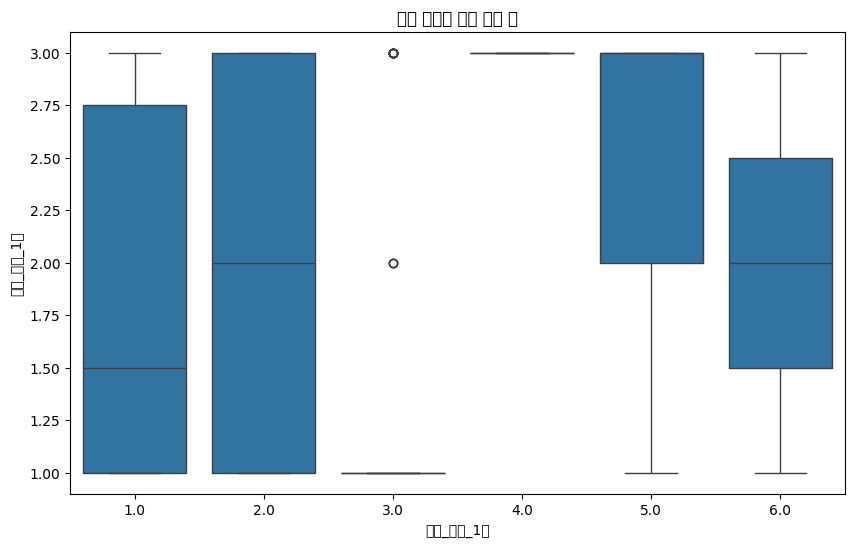

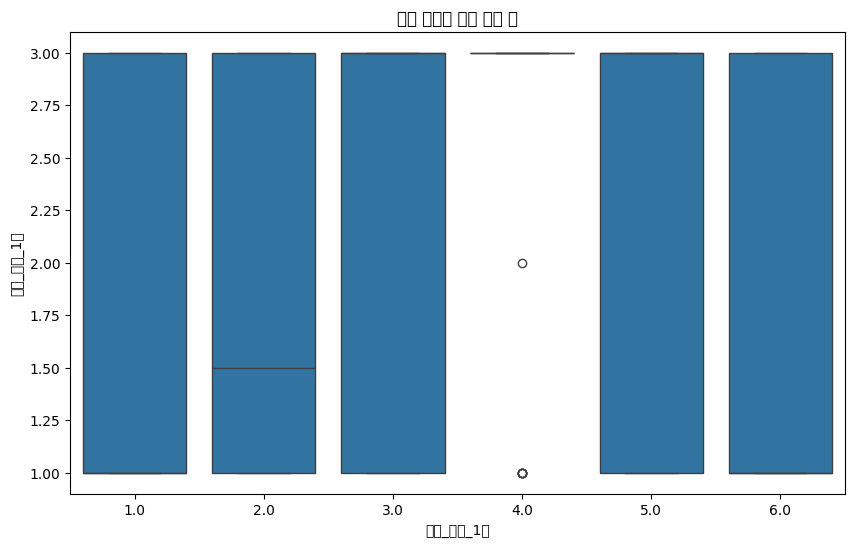

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

# 결혼 상태에 따른 음주 양의 차이 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='결혼_상태_1차', y='음주_여부_1차', data=df_selected)
plt.title('결혼 상태에 따른 음주 양')
plt.show()

# 교육 수준에 따른 음주 양 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='교육_수준_1차', y='음주_여부_1차', data=df_selected)
plt.title('교육 수준에 따른 음주 양')
plt.show()

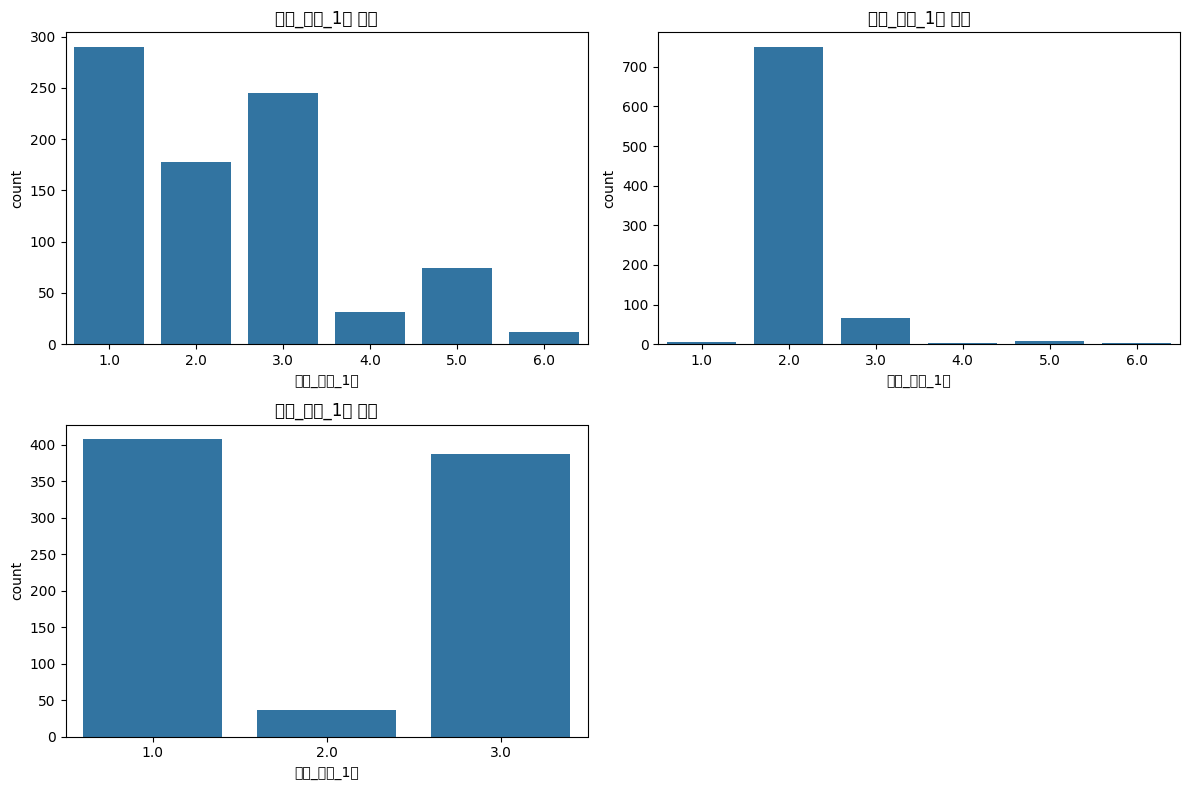

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['교육_수준_1차', '결혼_상태_1차', '음주_여부_1차']):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df_selected)
    plt.title(f'{col} 분포')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# 결혼 상태와 음주 여부 간의 교차표
contingency_table = pd.crosstab(df_selected['결혼_상태_1차'], df_selected['음주_여부_1차'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}, p-value: {p}')

Chi2 Statistic: 28.20538169561607, p-value: 0.0016734644105471917


In [ ]:
import pandas as pd
!pip install mord
from mord import LogisticIT
import numpy as np

# 독립 변수와 종속 변수 설정
x = df_selected[['교육_수준_1차', '결혼_상태_1차']]
y = df_selected['음주_여부_1차']  # 음주 빈도 변수

y = y.astype(int)

# 순서 로지스틱 회귀 모델
model = LogisticIT()
result = model.fit(x, y)

predictions = model.predict(x)

print(result.coef_)
print(result.score(x, y))

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=f0aa40ea7c5dd4c733521e28f8c709b4e1c03908c77d8a87528f5b98950db1e4
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# 독립 변수와 종속 변수 설정
x = df_selected[['교육_수준_1차', '결혼_상태_1차']]
y = df_selected['당뇨_1차']  # 음주 빈도 변수

y = y.astype(int)

# 순서 로지스틱 회귀 모델
model = LogisticIT()
result = model.fit(x, y)

predictions = model.predict(x)

print(result.coef_)
print(result.score(x, y))

ValueError: Input X contains NaN.

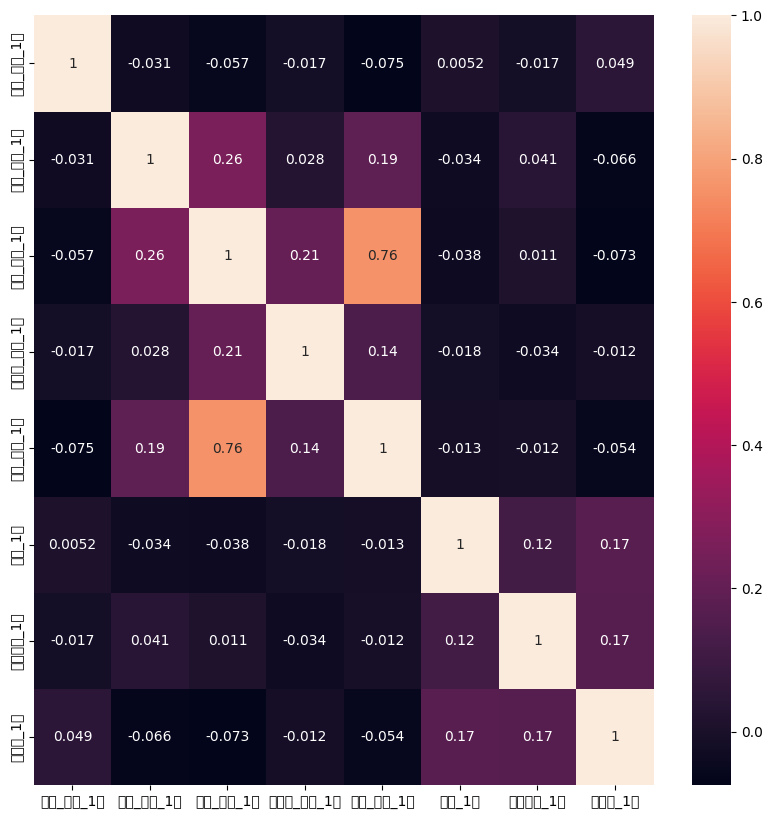

In [ ]:
x = df_selected[['결혼_상태_1차', '교육_수준_1차', '음주_여부_1차', '막걸리_빈도_1차',
                 '소주_빈도_1차','당뇨_1차', '고지혈증_1차', '고혈압_1차']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(x, annot=True)
plt.show()

## 가설 2. 사회적 환경(결혼 여부, 최종학력)에 따른 음주 빈도(음주 회수)의 차이가 있을 것이다.

### 1. 결혼 상태에 따른 음주 여부의 차이가 있을 것이다.

1 = 혼자, 2 = 결혼, 3 = 사별, 4 = 별거, 5 = 이혼, 6 = 기타


### 결혼상태가 변화한 데이터프레임

In [ ]:
# 결혼 상태 변화 확인
df_selected['결혼상태_변화'] =df_selected.apply(
    lambda row: 1 if row['결혼_상태_1차'] != row['결혼_상태_4차'] else 0, axis=1
)

# 변화된 행의 수 확인
changed_count = df_selected['결혼상태_변화'].sum()
print(f'결혼 상태가 변화한 행의 수: {changed_count}')

# 변화된 행 출력 (선택 사항)
changed_df = df_selected[df_selected['결혼상태_변화'] == 1]
display(changed_df)

결혼 상태가 변화한 행의 수: 72


,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,음주_여부_1차,음주_여부_2차,음주_여부_3차,음주_여부_4차,막걸리_빈도_1차,...,당뇨_4차,고지혈증_1차,고지혈증_2차,고지혈증_3차,고지혈증_4차,고혈압_1차,고혈압_2차,고혈압_3차,고혈압_4차,결혼상태_변화
3,2.0,2.0,NaN,2.0,3.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1,1,1,1.0,1,1,1,1.0,1
16,3.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,1.0,0.0,...,1.0,1,1,1,1.0,2,1,1,1.0,1
46,5.0,6.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1,1,1,2.0,1,1,1,1.0,1
69,1.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,0.0,...,1.0,1,1,1,1.0,1,1,1,1.0,1
71,1.0,2.0,NaN,2.0,3.0,1.0,1.0,3.0,3.0,0.0,...,1.0,1,1,1,1.0,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,1.0,2.0,2.0,2.0,NaN,1.0,3.0,1.0,NaN,0.0,...,NaN,1,1,1,NaN,1,1,1,NaN,1
811,1.0,5.0,NaN,3.0,2.0,3.0,3.0,3.0,3.0,0.0,...,1.0,1,1,1,1.0,1,1,1,1.0,1
826,1.0,3.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1,1,1,1.0,1,1,1,1.0,1
828,1.0,3.0,3.0,3.0,NaN,1.0,1.0,1.0,NaN,0.0,...,NaN,1,1,1,NaN,2,1,1,NaN,1


In [ ]:
marry_drink_df=df_selected[['결혼_상태_1차', '음주_여부_1차', '음주_여부_2차', '음주_여부_3차', '음주_여부_4차']]
marry_drink_df

,결혼_상태_1차,음주_여부_1차,음주_여부_2차,음주_여부_3차,음주_여부_4차
0,2.0,3.0,2.0,2.0,2.0
1,2.0,3.0,3.0,3.0,3.0
2,2.0,2.0,3.0,3.0,3.0
3,2.0,1.0,1.0,1.0,1.0
4,2.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...
832,2.0,1.0,1.0,1.0,1.0
833,2.0,3.0,3.0,3.0,3.0
834,2.0,3.0,3.0,3.0,3.0
835,2.0,3.0,2.0,1.0,1.0


## 결혼 상태가 변화하지 않은 데이터 프레임

In [ ]:
# changed_df의 인덱스를 사용하여 marry_drink_df에서 해당 행 제외
df2 = marry_drink_df.drop(changed_df.index)

# 결과 출력
df2

,결혼_상태_1차,음주_여부_1차,음주_여부_2차,음주_여부_3차,음주_여부_4차
0,2.0,3.0,2.0,2.0,2.0
1,2.0,3.0,3.0,3.0,3.0
2,2.0,2.0,3.0,3.0,3.0
4,2.0,3.0,3.0,3.0,3.0
5,2.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...
832,2.0,1.0,1.0,1.0,1.0
833,2.0,3.0,3.0,3.0,3.0
834,2.0,3.0,3.0,3.0,3.0
835,2.0,3.0,2.0,1.0,1.0


In [ ]:
df2.isnull().sum()

,0
결혼_상태_1차,0
음주_여부_1차,5
음주_여부_2차,0
음주_여부_3차,1
음주_여부_4차,0


In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.head()

,결혼_상태_1차,음주_여부_1차,음주_여부_2차,음주_여부_3차,음주_여부_4차
0,2.0,3.0,2.0,2.0,2.0
1,2.0,3.0,3.0,3.0,3.0
2,2.0,2.0,3.0,3.0,3.0
4,2.0,3.0,3.0,3.0,3.0
5,2.0,3.0,3.0,3.0,3.0


In [ ]:
df2.isnull().sum()

,0
결혼_상태_1차,0
음주_여부_1차,0
음주_여부_2차,0
음주_여부_3차,0
음주_여부_4차,0


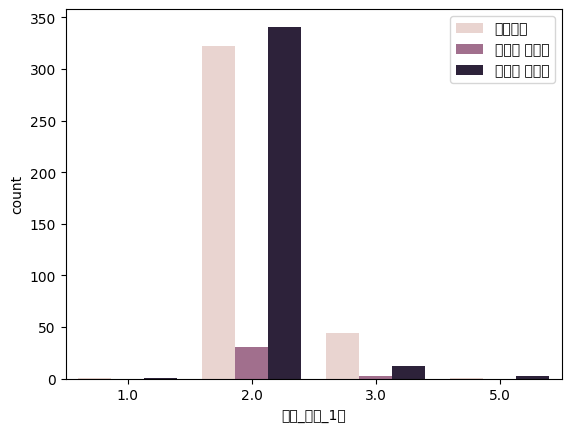

Chi2 Statistic: 19.940164101407184, p-value: 0.002838128406549926
결혼 상태와 음주 여부 Cramer's V: 0.15434822342921636


In [ ]:
# 교차표 생성
contingency_table = pd.crosstab(df2['결혼_상태_1차'], df2['음주_여부_1차'])

# 시각화
# 시각화
sns.countplot(x='결혼_상태_1차', hue='음주_여부_1차', data=df2)
plt.legend(labels=['비음주자', '형식적 음주자', '규칙적 음주자'])
plt.show()

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2 Statistic: {chi2}, p-value: {p}')

n = crosstab.sum().sum()
cramer_v = (chi2 / (n * (min(crosstab.shape) - 1))) ** 0.5

print(f"결혼 상태와 음주 여부 Cramer's V: {cramer_v}")

귀무가설 (H₀): 결혼 상태와 음주 여부는 서로 독립적이다.
대립가설 (H₁): 결혼 상태와 음주 여부는 서로 독립적이지 않다.

p-값이 0.003이라는 것은 일반적으로 사용되는 유의수준 α = 0.05와 비교했을 때, p-값이 훨씬 작다. 이는 귀무가설을 기각할 수 있음을 의미합니다. 즉, 결혼 상태와 음주 여부 사이에는 통계적으로 유의한 관계가 있다는 결론을 내릴 수 있다.

이 결과는 결혼 상태에 따라 음주 여부가 달라질 가능성이 있음

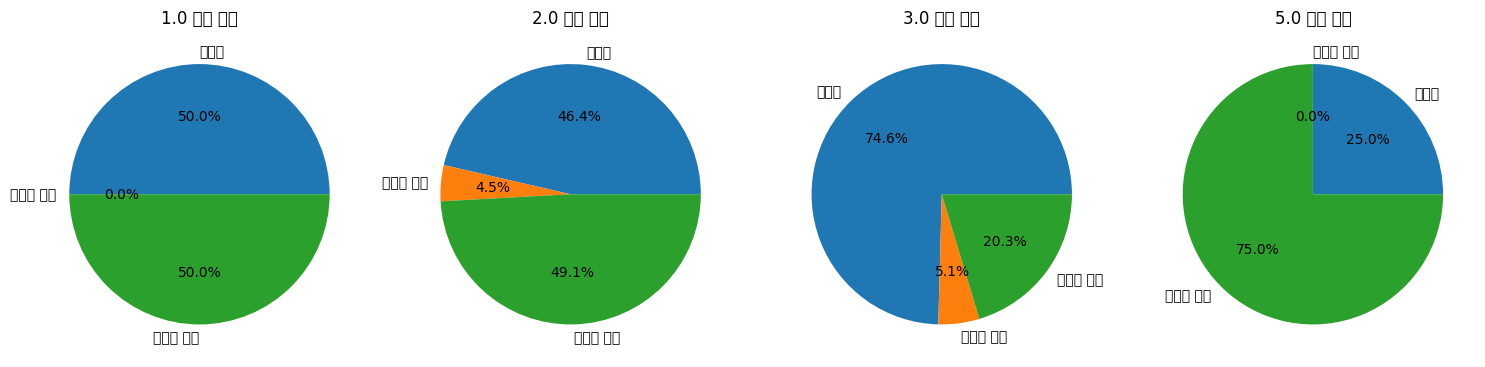

In [ ]:
# 결혼 상태 및 음주 여부별 데이터 개수 계산
marry_drink_counts = df2.groupby(['결혼_상태_1차', '음주_여부_1차'])['음주_여부_1차'].count().unstack()

# 결혼 상태별 음주 여부 비율 계산
marry_drink_ratio = marry_drink_counts.div(marry_drink_counts.sum(axis=1), axis=0)

# 파이 차트 그리기
fig, axes = plt.subplots(1, len(marry_drink_ratio), figsize=(15, 5))

for i, (marry_status, row) in enumerate(marry_drink_ratio.iterrows()):
    ax = axes[i]

    # Check for NaN values and replace with 0 for plotting
    row = row.fillna(0)

    ax.pie(row.values, labels=['비음주', '형식적 음주', '규칙적 음주'], autopct='%1.1f%%')
    ax.set_title(f'{marry_status} 결혼 상태')

plt.tight_layout()
plt.show()

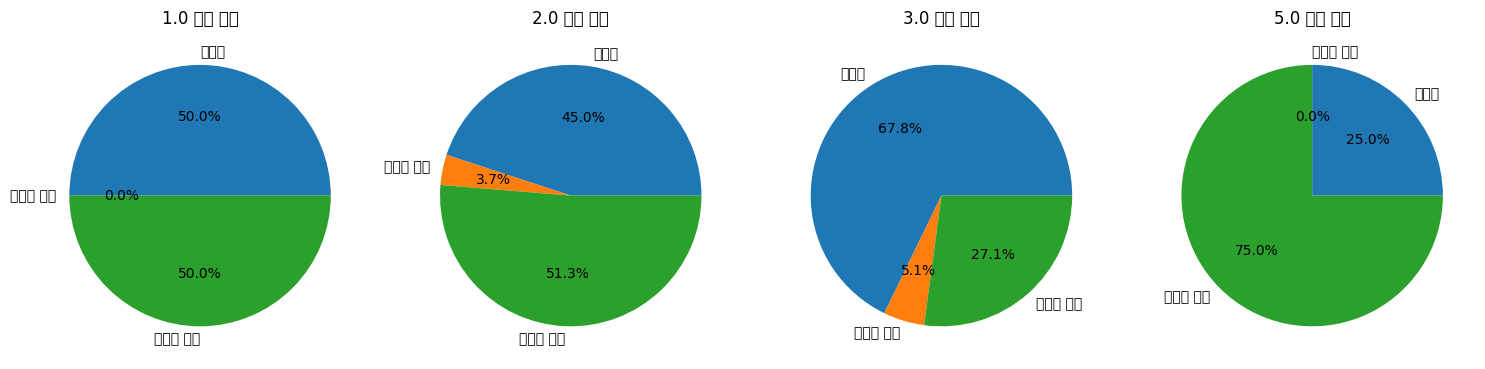

In [ ]:
# 결혼 상태 및 음주 여부별 데이터 개수 계산
marry_drink_counts = df2.groupby(['결혼_상태_1차', '음주_여부_2차'])['음주_여부_2차'].count().unstack()

# 결혼 상태별 음주 여부 비율 계산
marry_drink_ratio = marry_drink_counts.div(marry_drink_counts.sum(axis=1), axis=0)

# 파이 차트 그리기
fig, axes = plt.subplots(1, len(marry_drink_ratio), figsize=(15, 5))

for i, (marry_status, row) in enumerate(marry_drink_ratio.iterrows()):
    ax = axes[i]

    # Check for NaN values and replace with 0 for plotting
    row = row.fillna(0)

    ax.pie(row.values, labels=['비음주', '형식적 음주', '규칙적 음주'], autopct='%1.1f%%')
    ax.set_title(f'{marry_status} 결혼 상태')

plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_l'

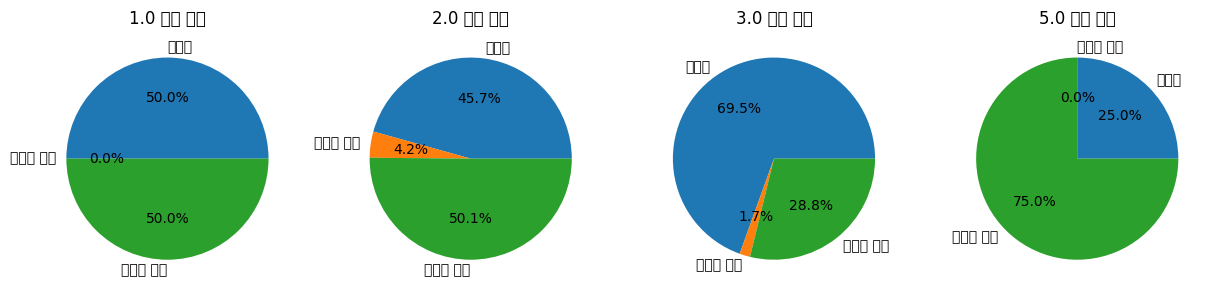

In [ ]:
# 결혼 상태 및 음주 여부별 데이터 개수 계산
marry_drink_counts = df2.groupby(['결혼_상태_1차', '음주_여부_3차'])['음주_여부_3차'].count().unstack()

# 결혼 상태별 음주 여부 비율 계산
marry_drink_ratio = marry_drink_counts.div(marry_drink_counts.sum(axis=1), axis=0)

# 파이 차트 그리기
fig, axes = plt.subplots(1, len(marry_drink_ratio), figsize=(15, 5))

for i, (marry_status, row) in enumerate(marry_drink_ratio.iterrows()):
    ax = axes[i]

    # Check for NaN values and replace with 0 for plotting
    row = row.fillna(0)

    ax.pie(row.values, labels=['비음주', '형식적 음주', '규칙적 음주'], autopct='%1.1f%%')
    ax.set_title(f'{marry_status} 결혼 상태')

plt.tight_l

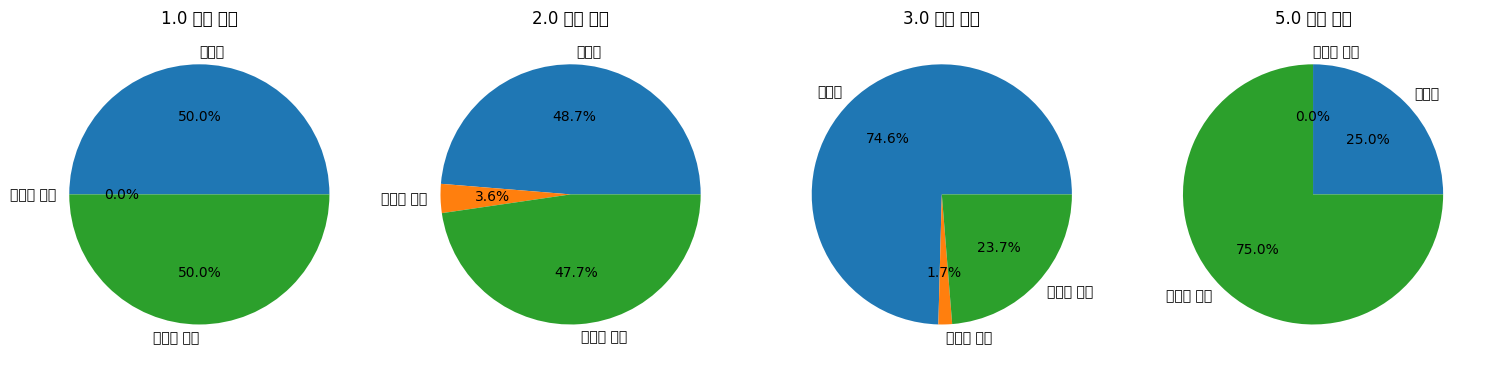

In [ ]:
# 결혼 상태 및 음주 여부별 데이터 개수 계산
marry_drink_counts = df2.groupby(['결혼_상태_1차', '음주_여부_4차'])['음주_여부_4차'].count().unstack()

# 결혼 상태별 음주 여부 비율 계산
marry_drink_ratio = marry_drink_counts.div(marry_drink_counts.sum(axis=1), axis=0)

# 파이 차트 그리기
fig, axes = plt.subplots(1, len(marry_drink_ratio), figsize=(15, 5))

for i, (marry_status, row) in enumerate(marry_drink_ratio.iterrows()):
    ax = axes[i]

    # Check for NaN values and replace with 0 for plotting
    row = row.fillna(0)

    ax.pie(row.values, labels=['비음주', '형식적 음주', '규칙적 음주'], autopct='%1.1f%%')
    ax.set_title(f'{marry_status} 결혼 상태')

plt.tight_layout()
plt.show()

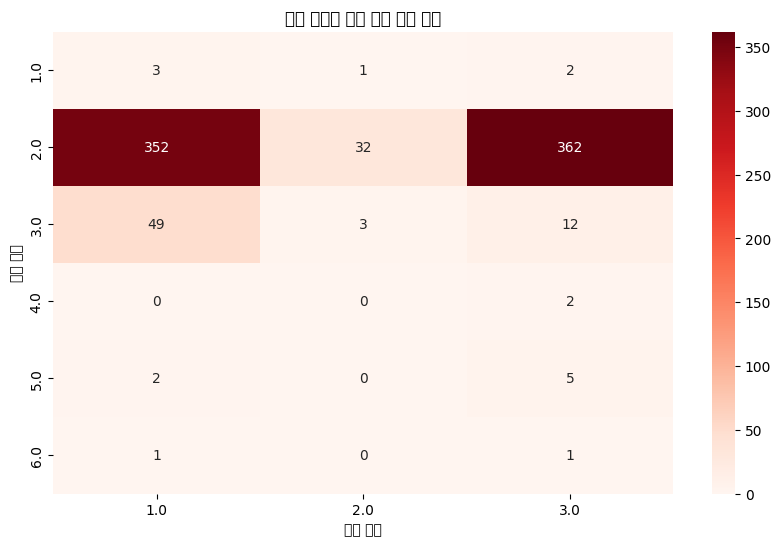

In [ ]:
contingency_table = pd.crosstab(df_selected['결혼_상태_1차'], df_selected['음주_여부_1차'])

# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds')
plt.title('결혼 상태와 음주 여부 간의 관계')
plt.xlabel('음주 여부')
plt.ylabel('결혼 상태')
plt.show()

### 결혼 상태에 따라 즐기는 음주 종류가 다를것이다

In [ ]:
selected_columns2 = [
    '결혼_상태_1차', '결혼_상태_2차', '결혼_상태_3차', '결혼_상태_4차',
    '맥주_빈도_1차', '맥주_빈도_2차', '맥주_빈도_3차', '맥주_빈도_4차',
    '소주_빈도_1차', '소주_빈도_2차', '소주_빈도_3차', '소주_빈도_4차',
    '막걸리_빈도_1차', '막걸리_빈도_2차', '막걸리_빈도_3차', '막걸리_빈도_4차',
    '증류주_빈도_1차', '증류주_빈도_2차', '증류주_빈도_3차', '증류주_빈도_4차',
    '사케_빈도_1차', '사케_빈도_2차', '사케_빈도_3차', '사케_빈도_4차',
    '와인_빈도_1차', '와인_빈도_2차', '와인_빈도_3차', '와인_빈도_4차'
]

df3=df[selected_columns2]
df3

,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,맥주_빈도_1차,맥주_빈도_2차,맥주_빈도_3차,맥주_빈도_4차,소주_빈도_1차,소주_빈도_2차,...,증류주_빈도_3차,증류주_빈도_4차,사케_빈도_1차,사케_빈도_2차,사케_빈도_3차,사케_빈도_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,2.0,NaN,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,NaN,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,NaN,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2.0,NaN,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,2.0,2.0,2.0,2.0,0.0,0.0,3.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# '결혼_상태_1차'와 '결혼_상태_3차'의 NaN이 아닌 값들을 비교합니다.
# 길이가 다를 경우를 대비하여 슬라이싱을 사용합니다.
# df3와 df_selected의 '결혼_상태_3차' 길이를 맞춰줍니다.
if (df3.loc[df3['결혼_상태_1차'].notna(), '결혼_상태_1차'].fillna(-1).values[:min(df3['결혼_상태_1차'].notna().sum(), df3['결혼_상태_3차'].notna().sum())] == \
    df3.loc[df3['결혼_상태_3차'].notna(), '결혼_상태_3차'].fillna(-1).values[:min(df3['결혼_상태_1차'].notna().sum(), df3['결혼_상태_3차'].notna().sum())]).all():

    # '결혼_상태_2차'의 NaN 값에 '결혼_상태_1차' 값을 채웁니다.
    df3['결혼_상태_2차'] = df3['결혼_상태_2차'].fillna(df3['결혼_상태_1차'])

# '결혼_상태_2차'가 여전히 NaN인 경우 '결혼_상태_3차' 값을 채웁니다.
df3['결혼_상태_2차'] = df3['결혼_상태_2차'].fillna(df3['결혼_상태_3차'])

In [ ]:
df3.isnull().sum()

,0
결혼_상태_1차,4
결혼_상태_2차,0
결혼_상태_3차,1
결혼_상태_4차,3
맥주_빈도_1차,11
맥주_빈도_2차,2
맥주_빈도_3차,4
맥주_빈도_4차,5
소주_빈도_1차,16
소주_빈도_2차,3


In [ ]:
# changed_df의 인덱스를 사용하여 marry_drink_df에서 해당 행 제외
df3 = df3.drop(changed_df.index)

# 결과 출력
df3

,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,맥주_빈도_1차,맥주_빈도_2차,맥주_빈도_3차,맥주_빈도_4차,소주_빈도_1차,소주_빈도_2차,...,증류주_빈도_3차,증류주_빈도_4차,사케_빈도_1차,사케_빈도_2차,사케_빈도_3차,사케_빈도_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,2.0,2.0,2.0,1.0,1.0,4.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,2.0,2.0,2.0,2.0,0.0,0.0,3.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3.isnull().sum()

,0
결혼_상태_1차,0
결혼_상태_2차,0
결혼_상태_3차,1
결혼_상태_4차,0
맥주_빈도_1차,8
맥주_빈도_2차,1
맥주_빈도_3차,4
맥주_빈도_4차,2
소주_빈도_1차,13
소주_빈도_2차,2


In [ ]:
df3.dropna(inplace=True)

In [ ]:
# 필요한 데이터 선택
choose_df1 = df3[['결혼_상태_1차', '맥주_빈도_1차', '소주_빈도_1차', '와인_빈도_1차', '사케_빈도_1차',
                  '막걸리_빈도_1차', '증류주_빈도_1차']]

# 데이터 확인
choose_df1

,결혼_상태_1차,맥주_빈도_1차,소주_빈도_1차,와인_빈도_1차,사케_빈도_1차,막걸리_빈도_1차,증류주_빈도_1차
0,2.0,0.0,4.0,0.0,0.0,0.0,0.0
1,2.0,1.0,5.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,3.0,0.0,0.0,0.0,0.0
5,2.0,1.0,4.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...
832,2.0,0.0,0.0,0.0,0.0,0.0,0.0
833,2.0,0.0,3.0,0.0,0.0,0.0,0.0
834,2.0,0.0,5.0,0.0,0.0,0.0,0.0
835,2.0,0.0,1.0,0.0,0.0,0.0,0.0


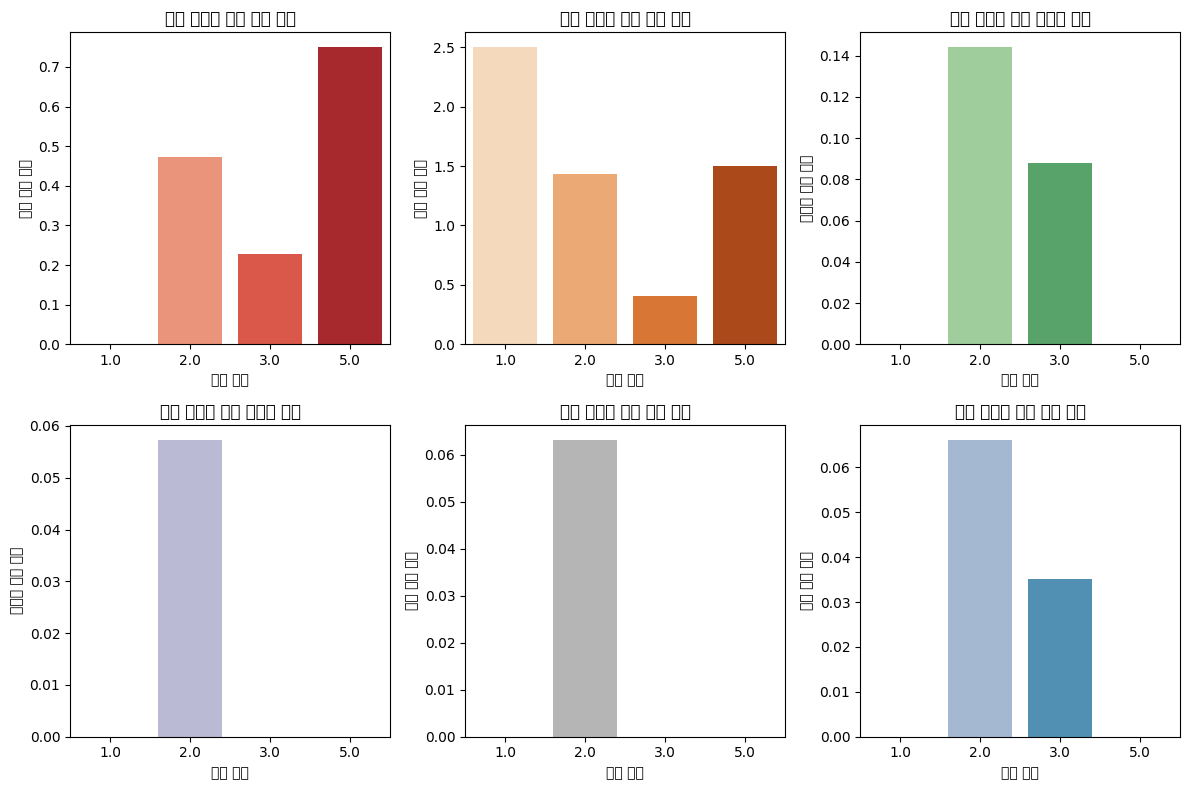

In [ ]:
mean_values = choose_df1.groupby('결혼_상태_1차').mean()

# 시각화
plt.figure(figsize=(12, 8))

# 맥주 빈도 시각화
plt.subplot(2, 3, 1)
sns.barplot(x=mean_values.index, y=mean_values['맥주_빈도_1차'], palette='Reds')
plt.title('결혼 상태에 따른 맥주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('맥주 빈도 평균')

# 소주 빈도 시각화
plt.subplot(2, 3, 2)
sns.barplot(x=mean_values.index, y=mean_values['소주_빈도_1차'], palette='Oranges')
plt.title('결혼 상태에 따른 소주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('소주 빈도 평균')

# 막걸리 빈도 시각화
plt.subplot(2, 3, 3)
sns.barplot(x=mean_values.index, y=mean_values['막걸리_빈도_1차'], palette='Greens')
plt.title('결혼 상태에 따른 막걸리 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('막걸리 빈도 평균')

# 증류주 빈도 시각화
plt.subplot(2, 3, 4)
sns.barplot(x=mean_values.index, y=mean_values['증류주_빈도_1차'], palette='Purples')
plt.title('결혼 상태에 따른 증류주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('증류주 빈도 평균')


# 사케 빈도 시각화
plt.subplot(2, 3, 5)
sns.barplot(x=mean_values.index, y=mean_values['사케_빈도_1차'], palette='Greys')
plt.title('결혼 상태에 따른 사케 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('사케 빈도 평균')

# 와인 빈도 시각화
plt.subplot(2, 3, 6)
sns.barplot(x=mean_values.index, y=mean_values['와인_빈도_1차'], palette='PuBu')
plt.title('결혼 상태에 따른 와인 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('와인 빈도 평균')

plt.tight_layout()
plt.show()

In [ ]:
# 필요한 데이터 선택
choose_df2 = df3[['결혼_상태_1차', '맥주_빈도_2차', '소주_빈도_2차', '와인_빈도_2차', '사케_빈도_2차',
                  '막걸리_빈도_2차', '증류주_빈도_2차']]

# 데이터 확인
choose_df2

,결혼_상태_1차,맥주_빈도_2차,소주_빈도_2차,와인_빈도_2차,사케_빈도_2차,막걸리_빈도_2차,증류주_빈도_2차
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,5.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,0.0,3.0,0.0,0.0,0.0,0.0
5,2.0,1.0,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...
832,2.0,0.0,0.0,0.0,0.0,0.0,0.0
833,2.0,0.0,3.0,0.0,0.0,0.0,0.0
834,2.0,2.0,4.0,0.0,0.0,0.0,0.0
835,2.0,0.0,0.0,0.0,0.0,0.0,0.0


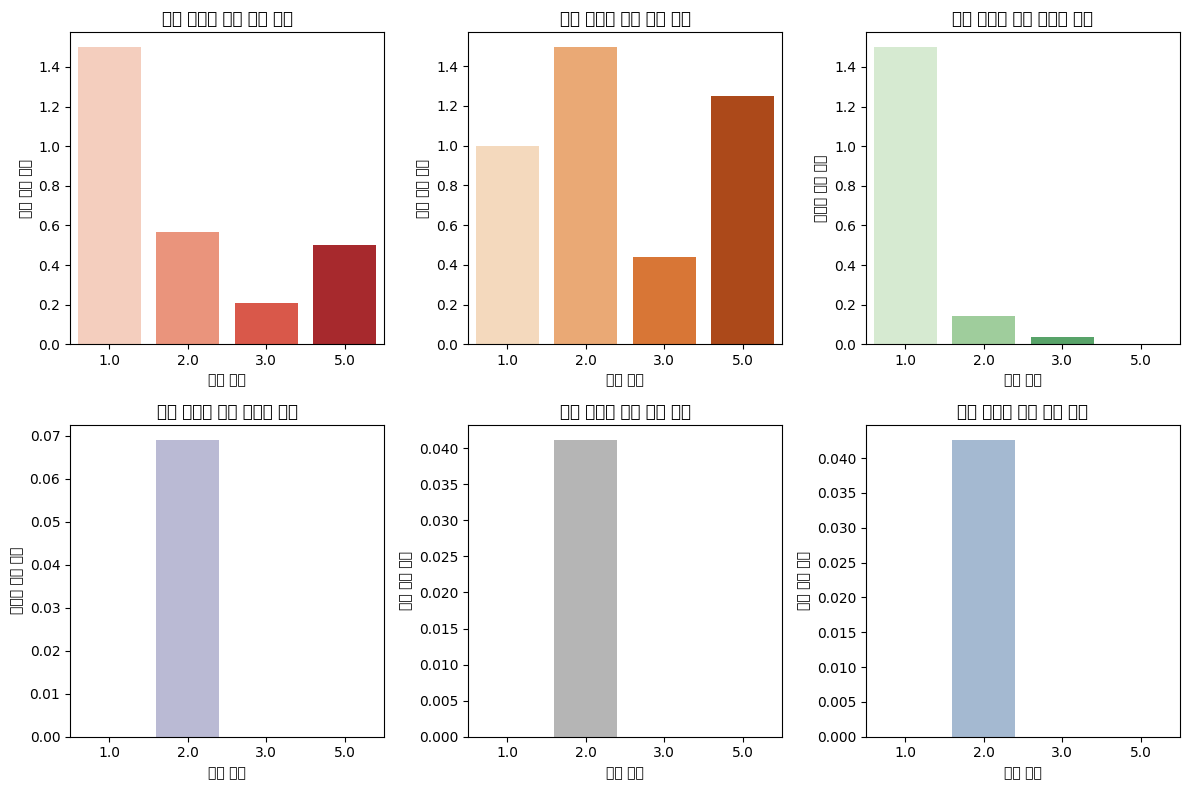

In [ ]:
mean_values = choose_df2.groupby('결혼_상태_1차').mean()

# 시각화
plt.figure(figsize=(12, 8))

# 맥주 빈도 시각화
plt.subplot(2, 3, 1)
sns.barplot(x=mean_values.index, y=mean_values['맥주_빈도_2차'], palette='Reds')
plt.title('결혼 상태에 따른 맥주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('맥주 빈도 평균')

# 소주 빈도 시각화
plt.subplot(2, 3, 2)
sns.barplot(x=mean_values.index, y=mean_values['소주_빈도_2차'], palette='Oranges')
plt.title('결혼 상태에 따른 소주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('소주 빈도 평균')

# 막걸리 빈도 시각화
plt.subplot(2, 3, 3)
sns.barplot(x=mean_values.index, y=mean_values['막걸리_빈도_2차'], palette='Greens')
plt.title('결혼 상태에 따른 막걸리 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('막걸리 빈도 평균')

# 증류주 빈도 시각화
plt.subplot(2, 3, 4)
sns.barplot(x=mean_values.index, y=mean_values['증류주_빈도_2차'], palette='Purples')
plt.title('결혼 상태에 따른 증류주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('증류주 빈도 평균')


# 사케 빈도 시각화
plt.subplot(2, 3, 5)
sns.barplot(x=mean_values.index, y=mean_values['사케_빈도_2차'], palette='Greys')
plt.title('결혼 상태에 따른 사케 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('사케 빈도 평균')

# 와인 빈도 시각화
plt.subplot(2, 3, 6)
sns.barplot(x=mean_values.index, y=mean_values['와인_빈도_2차'], palette='PuBu')
plt.title('결혼 상태에 따른 와인 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('와인 빈도 평균')

plt.tight_layout()
plt.show()

In [ ]:
# 필요한 데이터 선택
choose_df3 = df3[['결혼_상태_1차', '맥주_빈도_3차', '소주_빈도_3차', '와인_빈도_3차', '사케_빈도_3차',
                  '막걸리_빈도_3차', '증류주_빈도_3차']]

# 데이터 확인
choose_df3

,결혼_상태_1차,맥주_빈도_3차,소주_빈도_3차,와인_빈도_3차,사케_빈도_3차,막걸리_빈도_3차,증류주_빈도_3차
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,5.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,0.0,4.0,0.0,0.0,0.0,0.0
5,2.0,4.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
832,2.0,0.0,0.0,0.0,0.0,0.0,0.0
833,2.0,3.0,3.0,0.0,0.0,1.0,0.0
834,2.0,0.0,4.0,0.0,0.0,0.0,0.0
835,2.0,0.0,0.0,0.0,0.0,0.0,0.0


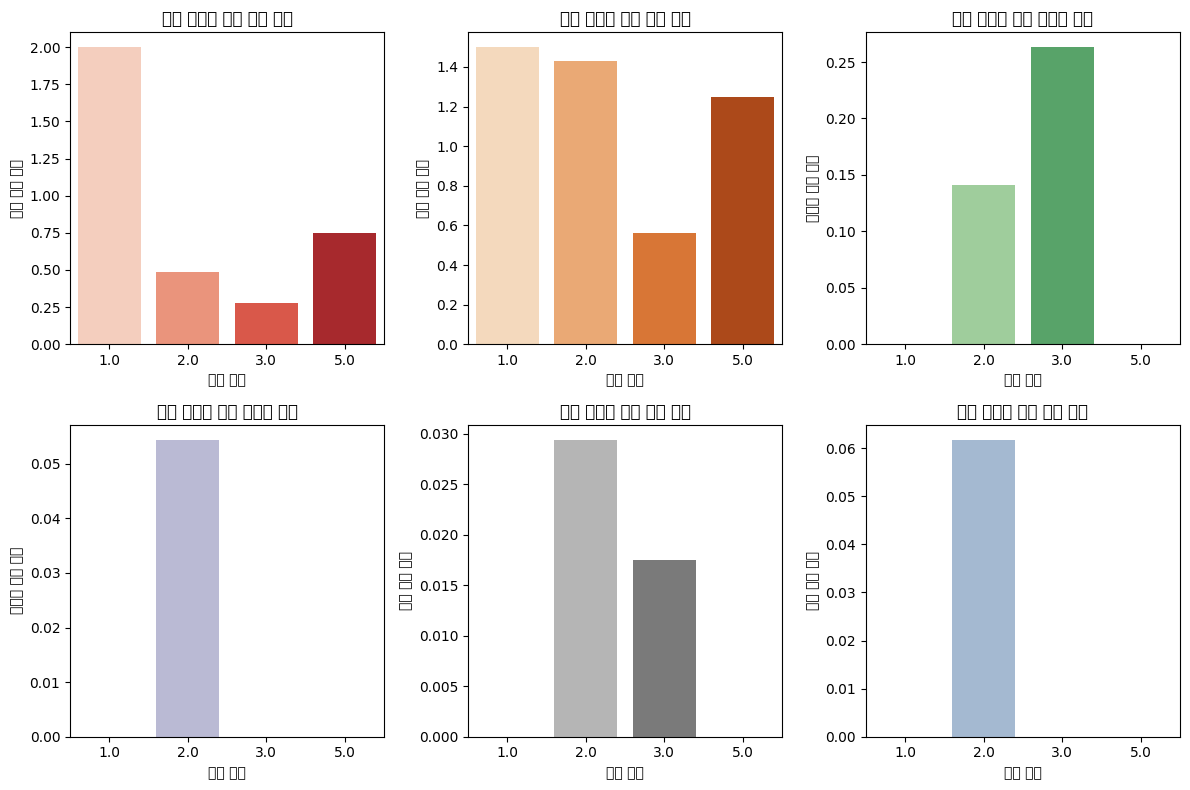

In [ ]:
mean_values = choose_df3.groupby('결혼_상태_1차').mean()

# 시각화
plt.figure(figsize=(12, 8))

# 맥주 빈도 시각화
plt.subplot(2, 3, 1)
sns.barplot(x=mean_values.index, y=mean_values['맥주_빈도_3차'], palette='Reds')
plt.title('결혼 상태에 따른 맥주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('맥주 빈도 평균')

# 소주 빈도 시각화
plt.subplot(2, 3, 2)
sns.barplot(x=mean_values.index, y=mean_values['소주_빈도_3차'], palette='Oranges')
plt.title('결혼 상태에 따른 소주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('소주 빈도 평균')

# 막걸리 빈도 시각화
plt.subplot(2, 3, 3)
sns.barplot(x=mean_values.index, y=mean_values['막걸리_빈도_3차'], palette='Greens')
plt.title('결혼 상태에 따른 막걸리 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('막걸리 빈도 평균')

# 증류주 빈도 시각화
plt.subplot(2, 3, 4)
sns.barplot(x=mean_values.index, y=mean_values['증류주_빈도_3차'], palette='Purples')
plt.title('결혼 상태에 따른 증류주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('증류주 빈도 평균')


# 사케 빈도 시각화
plt.subplot(2, 3, 5)
sns.barplot(x=mean_values.index, y=mean_values['사케_빈도_3차'], palette='Greys')
plt.title('결혼 상태에 따른 사케 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('사케 빈도 평균')

# 와인 빈도 시각화
plt.subplot(2, 3, 6)
sns.barplot(x=mean_values.index, y=mean_values['와인_빈도_3차'], palette='PuBu')
plt.title('결혼 상태에 따른 와인 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('와인 빈도 평균')

plt.tight_layout()
plt.show()

In [ ]:
# 필요한 데이터 선택
choose_df4 = df3[['결혼_상태_1차', '맥주_빈도_4차', '소주_빈도_4차', '와인_빈도_4차', '사케_빈도_4차',
                  '막걸리_빈도_4차', '증류주_빈도_4차']]

# 데이터 확인
choose_df4

,결혼_상태_1차,맥주_빈도_4차,소주_빈도_4차,와인_빈도_4차,사케_빈도_4차,막걸리_빈도_4차,증류주_빈도_4차
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,4.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4,2.0,0.0,4.0,0.0,0.0,0.0,0.0
5,2.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
832,2.0,0.0,0.0,0.0,0.0,0.0,0.0
833,2.0,2.0,6.0,0.0,0.0,0.0,0.0
834,2.0,0.0,5.0,0.0,0.0,0.0,0.0
835,2.0,0.0,0.0,0.0,0.0,0.0,0.0


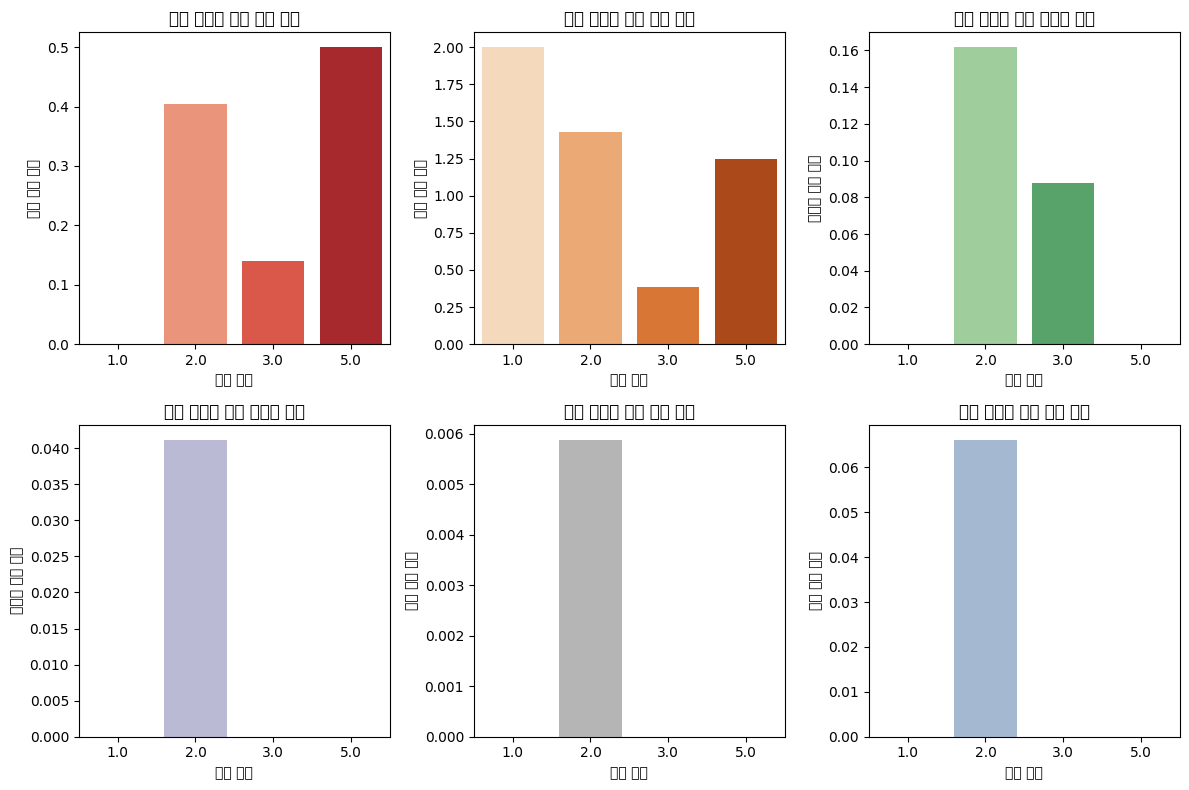

In [ ]:
mean_values = choose_df4.groupby('결혼_상태_1차').mean()

# 시각화
plt.figure(figsize=(12, 8))

# 맥주 빈도 시각화
plt.subplot(2, 3, 1)
sns.barplot(x=mean_values.index, y=mean_values['맥주_빈도_4차'], palette='Reds')
plt.title('결혼 상태에 따른 맥주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('맥주 빈도 평균')

# 소주 빈도 시각화
plt.subplot(2, 3, 2)
sns.barplot(x=mean_values.index, y=mean_values['소주_빈도_4차'], palette='Oranges')
plt.title('결혼 상태에 따른 소주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('소주 빈도 평균')

# 막걸리 빈도 시각화
plt.subplot(2, 3, 3)
sns.barplot(x=mean_values.index, y=mean_values['막걸리_빈도_4차'], palette='Greens')
plt.title('결혼 상태에 따른 막걸리 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('막걸리 빈도 평균')

# 증류주 빈도 시각화
plt.subplot(2, 3, 4)
sns.barplot(x=mean_values.index, y=mean_values['증류주_빈도_4차'], palette='Purples')
plt.title('결혼 상태에 따른 증류주 빈도')
plt.xlabel('결혼 상태')
plt.ylabel('증류주 빈도 평균')


# 사케 빈도 시각화
plt.subplot(2, 3, 5)
sns.barplot(x=mean_values.index, y=mean_values['사케_빈도_4차'], palette='Greys')
plt.title('결혼 상태에 따른 사케 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('사케 빈도 평균')

# 와인 빈도 시각화
plt.subplot(2, 3, 6)
sns.barplot(x=mean_values.index, y=mean_values['와인_빈도_4차'], palette='PuBu')
plt.title('결혼 상태에 따른 와인 빈도')
plt.xlabel('결혼 수준')
plt.ylabel('와인 빈도 평균')

plt.tight_layout()
plt.show()

In [ ]:
!pip install researchpy
import researchpy as rp

# 음료 리스트
drinks = ['맥주_빈도_1차', '소주_빈도_1차', '와인_빈도_1차', '사케_빈도_1차', '막걸리_빈도_1차', '증류주_빈도_1차']

# 음료 종류마다 결과 계산
for drink in drinks:
    # 교차표 및 Chi-square 검정 결과 계산
    crosstab, res = rp.crosstab(df3['결혼_상태_1차'], df3[drink], test='chi-square')

    # Chi-square 값 및 자유도 추출
    chi2 = res.loc[2, 'results']  # Pearson Chi-square 값
    dof = res.loc[1, 'results']  # 자유도 (df)

    # 교차표에서 총 표본 수 계산
    n = crosstab.sum().sum()

    # Cramér's V 계산
    cramer_v = (chi2 / (n * (min(crosstab.shape) - 1))) ** 0.5

    # 결과 출력
    print(f'{drink}: Chi-square = {chi2}, df = {dof}, Cramér\'s V = {cramer_v}')

맥주_빈도_1차: Chi-square = 0.076, df = 0.7986, Cramér's V = 0.002528438519302975
소주_빈도_1차: Chi-square = 0.1187, df = 0.0258, Cramér's V = 0.00315988270051641
와인_빈도_1차: Chi-square = 0.0329, df = 1.0, Cramér's V = 0.0016635794646672126
사케_빈도_1차: Chi-square = 0.0261, df = 1.0, Cramér's V = 0.0014817190191403933
막걸리_빈도_1차: Chi-square = 0.0324, df = 1.0, Cramér's V = 0.0016508898860558693
증류주_빈도_1차: Chi-square = 0.0328, df = 0.9835, Cramér's V = 0.0016610493043212992


# 가설3 (일)

## 데이터 로드

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DART-B/toy 24-2/Sorted_Merged_Data.xlsx')
df.head()

,T00_ID,T00_DATA_CLASS,T00_SEX,T01_EDU,T01_MARRY,T02_MARRY,T03_MARRY,T04_MARRY,T01_AGE,T02_AGE,...,T03_WEIGHT,T04_WEIGHT,T01_WINEAM,T02_WINEAM,T03_WINEAM,T04_WINEAM,T01_WINEFQ,T02_WINEFQ,T03_WINEFQ,T04_WINEFQ
0,K_FOLLOW_0001,F05,1,1,2,66666,2,2,56,58,...,51,52,77777.0,77777.0,77777.0,77777.0,0,0,0,0
1,K_FOLLOW_0002,F19,1,3,2,2,2,2,40,41,...,90,93,77777.0,77777.0,77777.0,77777.0,0,0,0,0
2,K_FOLLOW_0003,F05,1,2,2,66666,2,2,52,54,...,67,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0
3,K_FOLLOW_0004,F05,2,2,2,66666,2,3,60,62,...,71,70,77777.0,77777.0,77777.0,77777.0,0,0,0,0
4,K_FOLLOW_0005,F19,1,3,2,2,2,2,49,51,...,65,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0


In [ ]:
df.replace([66666, 77777, 99999], np.nan, inplace=True)

In [ ]:
# 영어 컬럼명을 한국어로 변환하기 위한 매핑
columns_translation = {
    'T00_ID': 'ID',
    'T00_DATA_CLASS': '데이터_단위',
    'T00_SEX': '성별',
    'T01_EDU': '교육_수준_1차',
    'T01_MARRY': '결혼_상태_1차',
    'T02_MARRY': '결혼_상태_2차',
    'T03_MARRY': '결혼_상태_3차',
    'T04_MARRY': '결혼_상태_4차',
    'T01_AGE': '나이_1차',
    'T02_AGE': '나이_2차',
    'T03_AGE': '나이_3차',
    'T04_AGE': '나이_4차',
    'T01_EDATE': '설문_날짜_1차',
    'T02_EDATE': '설문_날짜_2차',
    'T03_EDATE': '설문_날짜_3차',
    'T04_EDATE': '설문_날짜_4차',
    'T01_ALT': 'ALT_1차',
    'T02_ALT': 'ALT_2차',
    'T03_ALT': 'ALT_3차',
    'T04_ALT': 'ALT_4차',
    'T01_AST': 'AST_1차',
    'T02_AST': 'AST_2차',
    'T03_AST': 'AST_3차',
    'T04_AST': 'AST_4차',
    'T01_BEERAM': '맥주_양_1차',
    'T02_BEERAM': '맥주_양_2차',
    'T03_BEERAM': '맥주_양_3차',
    'T04_BEERAM': '맥주_양_4차',
    'T01_BEERFQ': '맥주_빈도_1차',
    'T02_BEERFQ': '맥주_빈도_2차',
    'T03_BEERFQ': '맥주_빈도_3차',
    'T04_BEERFQ': '맥주_빈도_4차',
    'T01_PMYN_C': '폐경_여부_1차',
    'T01_PMAG_C': '폐경_나이_1차',
    'T02_PMYN_C': '폐경_여부_2차',
    'T02_PMAG_C': '폐경_나이_2차',
    'T03_PMYN_C': '폐경_여부_3차',
    'T03_PMAG_C': '폐경_나이_3차',
    'T04_PMYN_C': '폐경_여부_4차',
    'T04_PMAG_C': '폐경_나이_4차',
    'T01_CHILD': '출산_여부_1차',
    'T01_CREATININE': '크레아티닌_1차',
    'T02_CREATININE': '크레아티닌_2차',
    'T03_CREATININE': '크레아티닌_3차',
    'T04_CREATININE': '크레아티닌_4차',
    'T01_DBP': '이완기_혈압_1차',
    'T02_DBP': '이완기_혈압_2차',
    'T03_DBP': '이완기_혈압_3차',
    'T04_DBP': '이완기_혈압_4차',
    'T01_DM': '당뇨_1차',
    'T02_DM': '당뇨_2차',
    'T03_DM': '당뇨_3차',
    'T04_DM': '당뇨_4차',
    'T01_DMAG': '당뇨_진단_나이_1차',
    'T02_DMAG': '당뇨_진단_나이_2차',
    'T03_DMAG': '당뇨_진단_나이_3차',
    'T04_DMAG': '당뇨_진단_나이_4차',
    'T01_DRDU': '음주_기간_1차',
    'T01_DRINK': '음주_여부_1차',
    'T02_DRINK': '음주_여부_2차',
    'T03_DRINK': '음주_여부_3차',
    'T04_DRINK': '음주_여부_4차',
    'T01_EXER': '고강도_운동_여부_1차',
    'T02_EXER': '고강도_운동_여부_2차',
    'T03_EXER': '고강도_운동_여부_3차',
    'T04_EXER': '고강도_운동_여부_4차',
    'T01_FLABAG': '첫_출산_나이_1차',
    'T01_FMFDM': '부모_당뇨_아버지_1차',
    'T02_FMFDM': '부모_당뇨_아버지_2차',
    'T03_FMFDM': '부모_당뇨_아버지_3차',
    'T04_FMFDM': '부모_당뇨_아버지_4차',
    'T01_FMFDMAG': '아버지_당뇨_진단_나이_1차',
    'T02_FMFDMAG': '아버지_당뇨_진단_나이_2차',
    'T03_FMFDMAG': '아버지_당뇨_진단_나이_3차',
    'T04_FMFDMAG': '아버지_당뇨_진단_나이_4차',
    'T01_FMFHT': '부모_고혈압_아버지_1차',
    'T02_FMFHT': '부모_고혈압_아버지_2차',
    'T03_FMFHT': '부모_고혈압_아버지_3차',
    'T04_FMFHT': '부모_고혈압_아버지_4차',
    'T01_FMFHTAG': '아버지_고혈압_진단_나이_1차',
    'T02_FMFHTAG': '아버지_고혈압_진단_나이_2차',
    'T03_FMFHTAG': '아버지_고혈압_진단_나이_3차',
    'T04_FMFHTAG': '아버지_고혈압_진단_나이_4차',
    'T01_FMMDM': '부모_당뇨_어머니_1차',
    'T02_FMMDM': '부모_당뇨_어머니_2차',
    'T03_FMMDM': '부모_당뇨_어머니_3차',
    'T04_FMMDM': '부모_당뇨_어머니_4차',
    'T01_FMMDMAG': '어머니_당뇨_진단_나이_1차',
    'T02_FMMDMAG': '어머니_당뇨_진단_나이_2차',
    'T03_FMMDMAG': '어머니_당뇨_진단_나이_3차',
    'T04_FMMDMAG': '어머니_당뇨_진단_나이_4차',
    'T01_FMMHT': '부모_고혈압_어머니_1차',
    'T02_FMMHT': '부모_고혈압_어머니_2차',
    'T03_FMMHT': '부모_고혈압_어머니_3차',
    'T04_FMMHT': '부모_고혈압_어머니_4차',
    'T01_FMMHTAG': '어머니_고혈압_진단_나이_1차',
    'T02_FMMHTAG': '어머니_고혈압_진단_나이_2차',
    'T03_FMMHTAG': '어머니_고혈압_진단_나이_3차',
    'T04_FMMHTAG': '어머니_고혈압_진단_나이_4차',
    'T01_FPREGAG': '첫_임신_나이_1차',
    'T01_GLU0': '공복_혈당_1차',
    'T02_GLU0': '공복_혈당_2차',
    'T03_GLU0': '공복_혈당_3차',
    'T04_GLU0': '공복_혈당_4차',
    'T01_HBA1C': 'HbA1C_1차',
    'T02_HBA1C': 'HbA1C_2차',
    'T03_HBA1C': 'HbA1C_3차',
    'T04_HBA1C': 'HbA1C_4차',
    'T01_HDL': 'HDL_콜레스테롤_1차',
    'T02_HDL': 'HDL_콜레스테롤_2차',
    'T03_HDL': 'HDL_콜레스테롤_3차',
    'T04_HDL': 'HDL_콜레스테롤_4차',
    'T01_HEIGHT': '신장_1차',
    'T02_HEIGHT': '신장_2차',
    'T03_HEIGHT': '신장_3차',
    'T04_HEIGHT': '신장_4차',
    'T01_HIP': '엉덩이둘레_1차',
    'T02_HIP': '엉덩이둘레_2차',
    'T03_HIP': '엉덩이둘레_3차',
    'T04_HIP': '엉덩이둘레_4차',
    'T01_HLIQAM': '증류주_양_1차',
    'T02_HLIQAM': '증류주_양_2차',
    'T03_HLIQAM': '증류주_양_3차',
    'T04_HLIQAM': '증류주_양_4차',
    'T01_HLIQFQ': '증류주_빈도_1차',
    'T02_HLIQFQ': '증류주_빈도_2차',
    'T03_HLIQFQ': '증류주_빈도_3차',
    'T04_HLIQFQ': '증류주_빈도_4차',
    'T01_HTN': '고혈압_1차',
    'T02_HTN': '고혈압_2차',
    'T03_HTN': '고혈압_3차',
    'T04_HTN': '고혈압_4차',
    'T01_HTNAG': '고혈압_진단_나이_1차',
    'T02_HTNAG': '고혈압_진단_나이_2차',
    'T03_HTNAG': '고혈압_진단_나이_3차',
    'T04_HTNAG': '고혈압_진단_나이_4차',
    'T01_INS0': '공복_인슐린_1차',
    'T02_INS0': '공복_인슐린_2차',
    'T03_INS0': '공복_인슐린_3차',
    'T04_INS0': '공복_인슐린_4차',
    'T01_LIP': '고지혈증_1차',
    'T02_LIP': '고지혈증_2차',
    'T03_LIP': '고지혈증_3차',
    'T04_LIP': '고지혈증_4차',
    'T01_LIPAG': '고지혈증_진단_나이_1차',
    'T02_LIPAG': '고지혈증_진단_나이_2차',
    'T03_LIPAG': '고지혈증_진단_나이_3차',
    'T04_LIPAG': '고지혈증_진단_나이_4차',
    'T01_MNSAG': '초경_나이_1차',
    'T01_PREG': '임신_경험_1차',
    'T01_PSM': '간접흡연_여부_1차',
    'T02_PSM': '간접흡연_여부_2차',
    'T03_PSM': '간접흡연_여부_3차',
    'T04_PSM': '간접흡연_여부_4차',
    'T01_PULSE': '심박수_1차',
    'T02_PULSE': '심박수_2차',
    'T03_PULSE': '심박수_3차',
    'T04_PULSE': '심박수_4차',
    'T01_RICEAM': '사케_양_1차',
    'T02_RICEAM': '사케_양_2차',
    'T03_RICEAM': '사케_양_3차',
    'T04_RICEAM': '사케_양_4차',
    'T01_RICEFQ': '사케_빈도_1차',
    'T02_RICEFQ': '사케_빈도_2차',
    'T03_RICEFQ': '사케_빈도_3차',
    'T04_RICEFQ': '사케_빈도_4차',
    'T01_SBP': '수축기_혈압_1차',
    'T02_SBP': '수축기_혈압_2차',
    'T03_SBP': '수축기_혈압_3차',
    'T04_SBP': '수축기_혈압_4차',
    'T01_SMAG': '흡연_시작_나이_1차',
    'T01_SMAM': '하루_흡연량_1차',
    'T02_SMAM': '하루_흡연량_2차',
    'T03_SMAM': '하루_흡연량_3차',
    'T04_SMAM': '하루_흡연량_4차',
    'T01_SMDU': '총_흡연_기간_1차',
    'T02_SMDU': '총_흡연_기간_2차',
    'T03_SMDU': '총_흡연_기간_3차',
    'T04_SMDU': '총_흡연_기간_4차',
    'T01_SMOKE': '흡연_상태_1차',
    'T02_SMOKE': '흡연_상태_2차',
    'T03_SMOKE': '흡연_상태_3차',
    'T04_SMOKE': '흡연_상태_4차',
    'T01_SOJUAM': '소주_양_1차',
    'T02_SOJUAM': '소주_양_2차',
    'T03_SOJUAM': '소주_양_3차',
    'T04_SOJUAM': '소주_양_4차',
    'T01_SOJUFQ': '소주_빈도_1차',
    'T02_SOJUFQ': '소주_빈도_2차',
    'T03_SOJUFQ': '소주_빈도_3차',
    'T04_SOJUFQ': '소주_빈도_4차',
    'T01_TAKAM': '막걸리_양_1차',
    'T02_TAKAM': '막걸리_양_2차',
    'T03_TAKAM': '막걸리_양_3차',
    'T04_TAKAM': '막걸리_양_4차',
    'T01_TAKFQ': '막걸리_빈도_1차',
    'T02_TAKFQ': '막걸리_빈도_2차',
    'T03_TAKFQ': '막걸리_빈도_3차',
    'T04_TAKFQ': '막걸리_빈도_4차',
    'T01_TCHL': '총_콜레스테롤_1차',
    'T02_TCHL': '총_콜레스테롤_2차',
    'T03_TCHL': '총_콜레스테롤_3차',
    'T04_TCHL': '총_콜레스테롤_4차',
    'T01_TG': '중성지방_1차',
    'T02_TG': '중성지방_2차',
    'T03_TG': '중성지방_3차',
    'T04_TG': '중성지방_4차',
    'T01_WAIST': '허리둘레_1차',
    'T02_WAIST': '허리둘레_2차',
    'T03_WAIST': '허리둘레_3차',
    'T04_WAIST': '허리둘레_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WINEAM': '와인_양_1차',
    'T02_WINEAM': '와인_양_2차',
    'T03_WINEAM': '와인_양_3차',
    'T04_WINEAM': '와인_양_4차',
    'T01_WINEFQ': '와인_빈도_1차',
    'T02_WINEFQ': '와인_빈도_2차',
    'T03_WINEFQ': '와인_빈도_3차',
    'T04_WINEFQ': '와인_빈도_4차'
}

# 컬럼명을 한국어로 변환
df.rename(columns=columns_translation, inplace=True)

# 변환된 컬럼명을 확인하기 위해 데이터프레임의 앞부분을 출력
df.head()

,ID,데이터_단위,성별,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,나이_1차,나이_2차,...,체중_3차,체중_4차,와인_양_1차,와인_양_2차,와인_양_3차,와인_양_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,K_FOLLOW_0001,F05,1,1.0,2.0,NaN,2.0,2.0,56,58,...,51.0,52,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,K_FOLLOW_0002,F19,1,3.0,2.0,2.0,2.0,2.0,40,41,...,90.0,93,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,K_FOLLOW_0003,F05,1,2.0,2.0,NaN,2.0,2.0,52,54,...,67.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,K_FOLLOW_0004,F05,2,2.0,2.0,NaN,2.0,3.0,60,62,...,71.0,70,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,K_FOLLOW_0005,F19,1,3.0,2.0,2.0,2.0,2.0,49,51,...,65.0,67,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## 가설 2: 최종 학력(교육 수준)에 따라 음주의 빈도에 차이가 있을 것이다.

In [ ]:
import scipy.stats as stats

# 필요한 컬럼만 선택
edu_drink_df = df[['교육_수준_1차', '와인_빈도_1차', '맥주_빈도_1차', '소주_빈도_1차']]

# 특이값(77777, 66666)을 NaN으로 처리
edu_drink_df.replace([77777, 66666], pd.NA, inplace=True)

# 각 음주 빈도를 교육 수준에 따라 그룹화하여 리스트로 저장
wine_frequencies = [edu_drink_df['와인_빈도_1차'][edu_drink_df['교육_수준_1차'] == level].dropna() for level in edu_drink_df['교육_수준_1차'].unique()]
beer_frequencies = [edu_drink_df['맥주_빈도_1차'][edu_drink_df['교육_수준_1차'] == level].dropna() for level in edu_drink_df['교육_수준_1차'].unique()]
soju_frequencies = [edu_drink_df['소주_빈도_1차'][edu_drink_df['교육_수준_1차'] == level].dropna() for level in edu_drink_df['교육_수준_1차'].unique()]

# ANOVA 검정 수행
wine_anova = stats.f_oneway(*wine_frequencies)
beer_anova = stats.f_oneway(*beer_frequencies)
soju_anova = stats.f_oneway(*soju_frequencies)

# 결과 출력
print("와인 빈도 ANOVA 결과:", wine_anova)
print("맥주 빈도 ANOVA 결과:", beer_anova)
print("소주 빈도 ANOVA 결과:", soju_anova)

와인 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)
맥주 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)
소주 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)


In [ ]:
# 교육 수준별 결측값 개수 확인
missing_data = edu_drink_df.isna().groupby(edu_drink_df['교육_수준_1차']).sum()
print(missing_data)

          교육_수준_1차  와인_빈도_1차  맥주_빈도_1차  소주_빈도_1차
교육_수준_1차                                        
1.0              0         2         1         4
2.0              0         5         5         5
3.0              0         3         3         4
4.0              0         0         0         1
5.0              0         1         1         1
6.0              0         0         0         0


In [ ]:
# 결측치 제거
edu_drink_df_clean = edu_drink_df.dropna(subset=['와인_빈도_1차', '맥주_빈도_1차', '소주_빈도_1차'])

# 각 음주 빈도를 교육 수준에 따라 그룹화하여 리스트로 저장
wine_frequencies_clean = [edu_drink_df_clean['와인_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in edu_drink_df_clean['교육_수준_1차'].unique()]
beer_frequencies_clean = [edu_drink_df_clean['맥주_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in edu_drink_df_clean['교육_수준_1차'].unique()]
soju_frequencies_clean = [edu_drink_df_clean['소주_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in edu_drink_df_clean['교육_수준_1차'].unique()]

# ANOVA 검정 수행
wine_anova_clean = stats.f_oneway(*wine_frequencies_clean)
beer_anova_clean = stats.f_oneway(*beer_frequencies_clean)
soju_anova_clean = stats.f_oneway(*soju_frequencies_clean)

# 결과 출력
print("와인 빈도 ANOVA 결과:", wine_anova_clean)
print("맥주 빈도 ANOVA 결과:", beer_anova_clean)
print("소주 빈도 ANOVA 결과:", soju_anova_clean)

와인 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)
맥주 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)
소주 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)


In [ ]:
# 결측치 제거
edu_drink_df_clean = edu_drink_df.dropna(subset=['와인_빈도_1차', '맥주_빈도_1차', '소주_빈도_1차'])

# 각 음주 빈도를 교육 수준에 따라 그룹화하여 리스트로 저장
wine_frequencies_clean = [edu_drink_df_clean['와인_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in edu_drink_df_clean['교육_수준_1차'].unique()]
beer_frequencies_clean = [edu_drink_df_clean['맥주_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in edu_drink_df_clean['교육_수준_1차'].unique()]
soju_frequencies_clean = [edu_drink_df_clean['소주_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in edu_drink_df_clean['교육_수준_1차'].unique()]

# ANOVA 검정 수행
wine_anova_clean = stats.f_oneway(*wine_frequencies_clean)
beer_anova_clean = stats.f_oneway(*beer_frequencies_clean)
soju_anova_clean = stats.f_oneway(*soju_frequencies_clean)

# 결과 출력
print("와인 빈도 ANOVA 결과:", wine_anova_clean)
print("맥주 빈도 ANOVA 결과:", beer_anova_clean)
print("소주 빈도 ANOVA 결과:", soju_anova_clean)

와인 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)
맥주 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)
소주 빈도 ANOVA 결과: F_onewayResult(statistic=nan, pvalue=nan)


In [ ]:
# 유효한 데이터를 갖고 있는 그룹만 선택
valid_levels = edu_drink_df_clean['교육_수준_1차'].value_counts()[edu_drink_df_clean['교육_수준_1차'].value_counts() > 2].index

# 각 음주 빈도를 유효한 그룹에 대해서만 다시 그룹화
wine_frequencies_valid = [edu_drink_df_clean['와인_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in valid_levels]
beer_frequencies_valid = [edu_drink_df_clean['맥주_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in valid_levels]
soju_frequencies_valid = [edu_drink_df_clean['소주_빈도_1차'][edu_drink_df_clean['교육_수준_1차'] == level].dropna() for level in valid_levels]

# ANOVA 검정 수행
wine_anova_valid = stats.f_oneway(*wine_frequencies_valid)
beer_anova_valid = stats.f_oneway(*beer_frequencies_valid)
soju_anova_valid = stats.f_oneway(*soju_frequencies_valid)

# 결과 출력
print("와인 빈도 ANOVA 결과:", wine_anova_valid)
print("맥주 빈도 ANOVA 결과:", beer_anova_valid)
print("소주 빈도 ANOVA 결과:", soju_anova_valid)

와인 빈도 ANOVA 결과: F_onewayResult(statistic=2.381435715785992, pvalue=0.03701405766284173)
맥주 빈도 ANOVA 결과: F_onewayResult(statistic=11.1455090564324, pvalue=2.1044844564403996e-10)
소주 빈도 ANOVA 결과: F_onewayResult(statistic=8.371624240865636, pvalue=9.891416497354343e-08)


1. 와인 빈도 ANOVA 결과:

F-값: 2.38

p-값: 0.037

해석: p-값이 0.05보다 작기 때문에 교육 수준에 따른 와인 빈도의 차이는 통계적으로 유의미함. 즉, 교육 수준에 따라 와인을 마시는 빈도가 차이가 있음.


2. 맥주 빈도 ANOVA 결과:

F-값: 11.15

p-값: 2.10e-10 (아주 작은 값)

해석: p-값이 0.05보다 훨씬 작기 때문에 교육 수준에 따른 맥주 빈도의 차이도 매우 통계적으로 유의미함. 교육 수준에 따라 맥주를 마시는 빈도는 확실히 차이가 있음.


3. 소주 빈도 ANOVA 결과:

F-값: 8.37

p-값: 9.89e-08 (아주 작은 값)

해석: 소주 빈도에 대해서도 p-값이 0.05보다 훨씬 작아, 교육 수준에 따라 소주 빈도가 유의미하게 차이가 났음.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

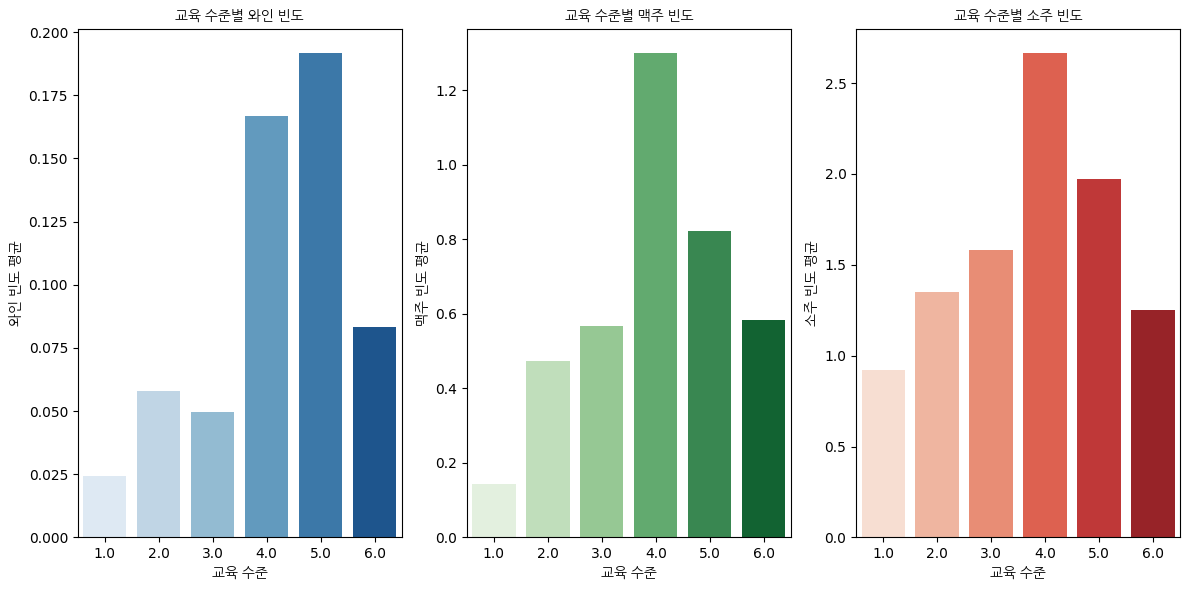

In [ ]:
# Colab에서 나눔 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 나눔 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 이후 코드에서 `fontprop`을 사용해 한글 폰트 적용 가능


# 컬럼명을 한국어로 변환하기 위한 매핑
columns_translation = {
    'T01_EDU': '교육_수준_1차',
    'T01_WINEFQ': '와인_빈도_1차',
    'T01_BEERFQ': '맥주_빈도_1차',
    'T01_SOJUFQ': '소주_빈도_1차',
}

# 컬럼명을 한국어로 변환
df.rename(columns=columns_translation, inplace=True)

# 필요한 컬럼만 선택
edu_drink_df = df[['교육_수준_1차', '와인_빈도_1차', '맥주_빈도_1차', '소주_빈도_1차']]

# 특이값(77777, 66666)을 NaN으로 처리
edu_drink_df.replace([77777, 66666], pd.NA, inplace=True)

# 결측치 제거
edu_drink_df_clean = edu_drink_df.dropna(subset=['와인_빈도_1차', '맥주_빈도_1차', '소주_빈도_1차'])

# 교육 수준별 음주 빈도의 평균을 시각화하기 위해 데이터프레임 생성
mean_values = edu_drink_df_clean.groupby('교육_수준_1차').mean()

# 시각화
plt.figure(figsize=(12, 6))

# 와인 빈도 시각화
plt.subplot(1, 3, 1)
sns.barplot(x=mean_values.index, y=mean_values['와인_빈도_1차'], palette='Blues')
plt.title('교육 수준별 와인 빈도', fontproperties=fontprop)
plt.xlabel('교육 수준', fontproperties=fontprop)
plt.ylabel('와인 빈도 평균', fontproperties=fontprop)

# 맥주 빈도 시각화
plt.subplot(1, 3, 2)
sns.barplot(x=mean_values.index, y=mean_values['맥주_빈도_1차'], palette='Greens')
plt.title('교육 수준별 맥주 빈도', fontproperties=fontprop)
plt.xlabel('교육 수준', fontproperties=fontprop)
plt.ylabel('맥주 빈도 평균', fontproperties=fontprop)

# 소주 빈도 시각화
plt.subplot(1, 3, 3)
sns.barplot(x=mean_values.index, y=mean_values['소주_빈도_1차'], palette='Reds')
plt.title('교육 수준별 소주 빈도', fontproperties=fontprop)
plt.xlabel('교육 수준', fontproperties=fontprop)
plt.ylabel('소주 빈도 평균', fontproperties=fontprop)

plt.tight_layout()
plt.show()

## 가설 3 : 교육 수준이 높을수록 음주 빈도는 낮아질까?

In [ ]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

plt.style.use('fivethirtyeight')
plt.ion()

import warnings

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import requests
from io import BytesIO

# GitHub 파일의 raw URL
url = 'https://github.com/JOyongho4/DARTB4/raw/main/KoreanHealthRecords/Sorted_Merged_Data.xlsx'

# 엑셀 파일을 pandas 데이터프레임으로 읽기
df = pd.read_excel(url, sheet_name='Sheet1')
# 데이터프레임 출력
print(df)

            T00_ID T00_DATA_CLASS  T00_SEX  T01_EDU  T01_MARRY  T02_MARRY  \
0    K_FOLLOW_0001            F05        1        1          2      66666   
1    K_FOLLOW_0002            F19        1        3          2          2   
2    K_FOLLOW_0003            F05        1        2          2      66666   
3    K_FOLLOW_0004            F05        2        2          2      66666   
4    K_FOLLOW_0005            F19        1        3          2          2   
..             ...            ...      ...      ...        ...        ...   
832  K_FOLLOW_0996            F05        1        1          2      66666   
833  K_FOLLOW_0997            F18        1        3          2          2   
834  K_FOLLOW_0998            F19        1        5          2          2   
835  K_FOLLOW_0999            F11        2        1          2          2   
836  K_FOLLOW_1000            F19        2        2          2          2   

     T03_MARRY  T04_MARRY  T01_AGE  T02_AGE  ...  T03_WEIGHT  T04_WEIGHT  \

In [ ]:
# 영어 컬럼명을 한국어로 변환하기 위한 매핑
columns_translation = {
    'T00_ID': 'ID',
    'T00_DATA_CLASS': '데이터_단위',
    'T00_SEX': '성별',
    'T01_EDU': '교육_수준_1차',
    'T01_MARRY': '결혼_상태_1차',
    'T02_MARRY': '결혼_상태_2차',
    'T03_MARRY': '결혼_상태_3차',
    'T04_MARRY': '결혼_상태_4차',
    'T01_AGE': '나이_1차',
    'T02_AGE': '나이_2차',
    'T03_AGE': '나이_3차',
    'T04_AGE': '나이_4차',
    'T01_EDATE': '설문_날짜_1차',
    'T02_EDATE': '설문_날짜_2차',
    'T03_EDATE': '설문_날짜_3차',
    'T04_EDATE': '설문_날짜_4차',
    'T01_ALT': 'ALT_1차',
    'T02_ALT': 'ALT_2차',
    'T03_ALT': 'ALT_3차',
    'T04_ALT': 'ALT_4차',
    'T01_AST': 'AST_1차',
    'T02_AST': 'AST_2차',
    'T03_AST': 'AST_3차',
    'T04_AST': 'AST_4차',
    'T01_BEERAM': '맥주_양_1차',
    'T02_BEERAM': '맥주_양_2차',
    'T03_BEERAM': '맥주_양_3차',
    'T04_BEERAM': '맥주_양_4차',
    'T01_BEERFQ': '맥주_빈도_1차',
    'T02_BEERFQ': '맥주_빈도_2차',
    'T03_BEERFQ': '맥주_빈도_3차',
    'T04_BEERFQ': '맥주_빈도_4차',
    'T01_PMYN_C': '폐경_여부_1차',
    'T01_PMAG_C': '폐경_나이_1차',
    'T02_PMYN_C': '폐경_여부_2차',
    'T02_PMAG_C': '폐경_나이_2차',
    'T03_PMYN_C': '폐경_여부_3차',
    'T03_PMAG_C': '폐경_나이_3차',
    'T04_PMYN_C': '폐경_여부_4차',
    'T04_PMAG_C': '폐경_나이_4차',
    'T01_CHILD': '출산_여부_1차',
    'T01_CREATININE': '크레아티닌_1차',
    'T02_CREATININE': '크레아티닌_2차',
    'T03_CREATININE': '크레아티닌_3차',
    'T04_CREATININE': '크레아티닌_4차',
    'T01_DBP': '이완기_혈압_1차',
    'T02_DBP': '이완기_혈압_2차',
    'T03_DBP': '이완기_혈압_3차',
    'T04_DBP': '이완기_혈압_4차',
    'T01_DM': '당뇨_1차',
    'T02_DM': '당뇨_2차',
    'T03_DM': '당뇨_3차',
    'T04_DM': '당뇨_4차',
    'T01_DMAG': '당뇨_진단_나이_1차',
    'T02_DMAG': '당뇨_진단_나이_2차',
    'T03_DMAG': '당뇨_진단_나이_3차',
    'T04_DMAG': '당뇨_진단_나이_4차',
    'T01_DRDU': '음주_기간_1차',
    'T01_DRINK': '음주_여부_1차',
    'T02_DRINK': '음주_여부_2차',
    'T03_DRINK': '음주_여부_3차',
    'T04_DRINK': '음주_여부_4차',
    'T01_EXER': '고강도_운동_여부_1차',
    'T02_EXER': '고강도_운동_여부_2차',
    'T03_EXER': '고강도_운동_여부_3차',
    'T04_EXER': '고강도_운동_여부_4차',
    'T01_FLABAG': '첫_출산_나이_1차',
    'T01_FMFDM': '부모_당뇨_아버지_1차',
    'T02_FMFDM': '부모_당뇨_아버지_2차',
    'T03_FMFDM': '부모_당뇨_아버지_3차',
    'T04_FMFDM': '부모_당뇨_아버지_4차',
    'T01_FMFDMAG': '아버지_당뇨_진단_나이_1차',
    'T02_FMFDMAG': '아버지_당뇨_진단_나이_2차',
    'T03_FMFDMAG': '아버지_당뇨_진단_나이_3차',
    'T04_FMFDMAG': '아버지_당뇨_진단_나이_4차',
    'T01_FMFHT': '부모_고혈압_아버지_1차',
    'T02_FMFHT': '부모_고혈압_아버지_2차',
    'T03_FMFHT': '부모_고혈압_아버지_3차',
    'T04_FMFHT': '부모_고혈압_아버지_4차',
    'T01_FMFHTAG': '아버지_고혈압_진단_나이_1차',
    'T02_FMFHTAG': '아버지_고혈압_진단_나이_2차',
    'T03_FMFHTAG': '아버지_고혈압_진단_나이_3차',
    'T04_FMFHTAG': '아버지_고혈압_진단_나이_4차',
    'T01_FMMDM': '부모_당뇨_어머니_1차',
    'T02_FMMDM': '부모_당뇨_어머니_2차',
    'T03_FMMDM': '부모_당뇨_어머니_3차',
    'T04_FMMDM': '부모_당뇨_어머니_4차',
    'T01_FMMDMAG': '어머니_당뇨_진단_나이_1차',
    'T02_FMMDMAG': '어머니_당뇨_진단_나이_2차',
    'T03_FMMDMAG': '어머니_당뇨_진단_나이_3차',
    'T04_FMMDMAG': '어머니_당뇨_진단_나이_4차',
    'T01_FMMHT': '부모_고혈압_어머니_1차',
    'T02_FMMHT': '부모_고혈압_어머니_2차',
    'T03_FMMHT': '부모_고혈압_어머니_3차',
    'T04_FMMHT': '부모_고혈압_어머니_4차',
    'T01_FMMHTAG': '어머니_고혈압_진단_나이_1차',
    'T02_FMMHTAG': '어머니_고혈압_진단_나이_2차',
    'T03_FMMHTAG': '어머니_고혈압_진단_나이_3차',
    'T04_FMMHTAG': '어머니_고혈압_진단_나이_4차',
    'T01_FPREGAG': '첫_임신_나이_1차',
    'T01_GLU0': '공복_혈당_1차',
    'T02_GLU0': '공복_혈당_2차',
    'T03_GLU0': '공복_혈당_3차',
    'T04_GLU0': '공복_혈당_4차',
    'T01_HBA1C': 'HbA1C_1차',
    'T02_HBA1C': 'HbA1C_2차',
    'T03_HBA1C': 'HbA1C_3차',
    'T04_HBA1C': 'HbA1C_4차',
    'T01_HDL': 'HDL_콜레스테롤_1차',
    'T02_HDL': 'HDL_콜레스테롤_2차',
    'T03_HDL': 'HDL_콜레스테롤_3차',
    'T04_HDL': 'HDL_콜레스테롤_4차',
    'T01_HEIGHT': '신장_1차',
    'T02_HEIGHT': '신장_2차',
    'T03_HEIGHT': '신장_3차',
    'T04_HEIGHT': '신장_4차',
    'T01_HIP': '엉덩이둘레_1차',
    'T02_HIP': '엉덩이둘레_2차',
    'T03_HIP': '엉덩이둘레_3차',
    'T04_HIP': '엉덩이둘레_4차',
    'T01_HLIQAM': '증류주_양_1차',
    'T02_HLIQAM': '증류주_양_2차',
    'T03_HLIQAM': '증류주_양_3차',
    'T04_HLIQAM': '증류주_양_4차',
    'T01_HLIQFQ': '증류주_빈도_1차',
    'T02_HLIQFQ': '증류주_빈도_2차',
    'T03_HLIQFQ': '증류주_빈도_3차',
    'T04_HLIQFQ': '증류주_빈도_4차',
    'T01_HTN': '고혈압_1차',
    'T02_HTN': '고혈압_2차',
    'T03_HTN': '고혈압_3차',
    'T04_HTN': '고혈압_4차',
    'T01_HTNAG': '고혈압_진단_나이_1차',
    'T02_HTNAG': '고혈압_진단_나이_2차',
    'T03_HTNAG': '고혈압_진단_나이_3차',
    'T04_HTNAG': '고혈압_진단_나이_4차',
    'T01_INS0': '공복_인슐린_1차',
    'T02_INS0': '공복_인슐린_2차',
    'T03_INS0': '공복_인슐린_3차',
    'T04_INS0': '공복_인슐린_4차',
    'T01_LIP': '고지혈증_1차',
    'T02_LIP': '고지혈증_2차',
    'T03_LIP': '고지혈증_3차',
    'T04_LIP': '고지혈증_4차',
    'T01_LIPAG': '고지혈증_진단_나이_1차',
    'T02_LIPAG': '고지혈증_진단_나이_2차',
    'T03_LIPAG': '고지혈증_진단_나이_3차',
    'T04_LIPAG': '고지혈증_진단_나이_4차',
    'T01_MNSAG': '초경_나이_1차',
    'T01_PREG': '임신_경험_1차',
    'T01_PSM': '간접흡연_여부_1차',
    'T02_PSM': '간접흡연_여부_2차',
    'T03_PSM': '간접흡연_여부_3차',
    'T04_PSM': '간접흡연_여부_4차',
    'T01_PULSE': '심박수_1차',
    'T02_PULSE': '심박수_2차',
    'T03_PULSE': '심박수_3차',
    'T04_PULSE': '심박수_4차',
    'T01_RICEAM': '사케_양_1차',
    'T02_RICEAM': '사케_양_2차',
    'T03_RICEAM': '사케_양_3차',
    'T04_RICEAM': '사케_양_4차',
    'T01_RICEFQ': '사케_빈도_1차',
    'T02_RICEFQ': '사케_빈도_2차',
    'T03_RICEFQ': '사케_빈도_3차',
    'T04_RICEFQ': '사케_빈도_4차',
    'T01_SBP': '수축기_혈압_1차',
    'T02_SBP': '수축기_혈압_2차',
    'T03_SBP': '수축기_혈압_3차',
    'T04_SBP': '수축기_혈압_4차',
    'T01_SMAG': '흡연_시작_나이_1차',
    'T01_SMAM': '하루_흡연량_1차',
    'T02_SMAM': '하루_흡연량_2차',
    'T03_SMAM': '하루_흡연량_3차',
    'T04_SMAM': '하루_흡연량_4차',
    'T01_SMDU': '총_흡연_기간_1차',
    'T02_SMDU': '총_흡연_기간_2차',
    'T03_SMDU': '총_흡연_기간_3차',
    'T04_SMDU': '총_흡연_기간_4차',
    'T01_SMOKE': '흡연_상태_1차',
    'T02_SMOKE': '흡연_상태_2차',
    'T03_SMOKE': '흡연_상태_3차',
    'T04_SMOKE': '흡연_상태_4차',
    'T01_SOJUAM': '소주_양_1차',
    'T02_SOJUAM': '소주_양_2차',
    'T03_SOJUAM': '소주_양_3차',
    'T04_SOJUAM': '소주_양_4차',
    'T01_SOJUFQ': '소주_빈도_1차',
    'T02_SOJUFQ': '소주_빈도_2차',
    'T03_SOJUFQ': '소주_빈도_3차',
    'T04_SOJUFQ': '소주_빈도_4차',
    'T01_TAKAM': '막걸리_양_1차',
    'T02_TAKAM': '막걸리_양_2차',
    'T03_TAKAM': '막걸리_양_3차',
    'T04_TAKAM': '막걸리_양_4차',
    'T01_TAKFQ': '막걸리_빈도_1차',
    'T02_TAKFQ': '막걸리_빈도_2차',
    'T03_TAKFQ': '막걸리_빈도_3차',
    'T04_TAKFQ': '막걸리_빈도_4차',
    'T01_TCHL': '총_콜레스테롤_1차',
    'T02_TCHL': '총_콜레스테롤_2차',
    'T03_TCHL': '총_콜레스테롤_3차',
    'T04_TCHL': '총_콜레스테롤_4차',
    'T01_TG': '중성지방_1차',
    'T02_TG': '중성지방_2차',
    'T03_TG': '중성지방_3차',
    'T04_TG': '중성지방_4차',
    'T01_WAIST': '허리둘레_1차',
    'T02_WAIST': '허리둘레_2차',
    'T03_WAIST': '허리둘레_3차',
    'T04_WAIST': '허리둘레_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WEIGHT': '체중_1차',
    'T02_WEIGHT': '체중_2차',
    'T03_WEIGHT': '체중_3차',
    'T04_WEIGHT': '체중_4차',
    'T01_WINEAM': '와인_양_1차',
    'T02_WINEAM': '와인_양_2차',
    'T03_WINEAM': '와인_양_3차',
    'T04_WINEAM': '와인_양_4차',
    'T01_WINEFQ': '와인_빈도_1차',
    'T02_WINEFQ': '와인_빈도_2차',
    'T03_WINEFQ': '와인_빈도_3차',
    'T04_WINEFQ': '와인_빈도_4차'
}

# 컬럼명을 한국어로 변환
df.rename(columns=columns_translation, inplace=True)

# 변환된 컬럼명을 확인하기 위해 데이터프레임의 앞부분을 출력
df.head()

,ID,데이터_단위,성별,교육_수준_1차,결혼_상태_1차,결혼_상태_2차,결혼_상태_3차,결혼_상태_4차,나이_1차,나이_2차,...,체중_3차,체중_4차,와인_양_1차,와인_양_2차,와인_양_3차,와인_양_4차,와인_빈도_1차,와인_빈도_2차,와인_빈도_3차,와인_빈도_4차
0,K_FOLLOW_0001,F05,1,1,2,66666,2,2,56,58,...,51,52,77777.0,77777.0,77777.0,77777.0,0,0,0,0
1,K_FOLLOW_0002,F19,1,3,2,2,2,2,40,41,...,90,93,77777.0,77777.0,77777.0,77777.0,0,0,0,0
2,K_FOLLOW_0003,F05,1,2,2,66666,2,2,52,54,...,67,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0
3,K_FOLLOW_0004,F05,2,2,2,66666,2,3,60,62,...,71,70,77777.0,77777.0,77777.0,77777.0,0,0,0,0
4,K_FOLLOW_0005,F19,1,3,2,2,2,2,49,51,...,65,67,77777.0,77777.0,77777.0,77777.0,0,0,0,0


In [ ]:
# GitHub 파일의 raw URL
url = 'https://github.com/JOyongho4/DARTB4/raw/main/KoreanHealthRecords/Sorted_Merged_Data.xlsx'

# 엑셀 파일을 pandas 데이터프레임으로 읽기
df = pd.read_excel(url, sheet_name='Sheet1')
# 데이터프레임 출력
print(df)

# 칼럼명을 한국어로 변환
df.rename(columns=columns_translation, inplace=True)

# 결측치 확인
print(df.isnull().sum())

# 필요한 데이터 선택
analysis_df = df[['교육_수준_1차', '맥주_빈도_1차', '소주_빈도_1차', '와인_빈도_1차', '사케_빈도_1차']]

# 결측치 처리
analysis_df.dropna(inplace=True)

# 데이터 확인
print(analysis_df.head())

            T00_ID T00_DATA_CLASS  T00_SEX  T01_EDU  T01_MARRY  T02_MARRY  \
0    K_FOLLOW_0001            F05        1        1          2      66666   
1    K_FOLLOW_0002            F19        1        3          2          2   
2    K_FOLLOW_0003            F05        1        2          2      66666   
3    K_FOLLOW_0004            F05        2        2          2      66666   
4    K_FOLLOW_0005            F19        1        3          2          2   
..             ...            ...      ...      ...        ...        ...   
832  K_FOLLOW_0996            F05        1        1          2      66666   
833  K_FOLLOW_0997            F18        1        3          2          2   
834  K_FOLLOW_0998            F19        1        5          2          2   
835  K_FOLLOW_0999            F11        2        1          2          2   
836  K_FOLLOW_1000            F19        2        2          2          2   

     T03_MARRY  T04_MARRY  T01_AGE  T02_AGE  ...  T03_WEIGHT  T04_WEIGHT  \

In [ ]:
# 교육 수준별로 음주 빈도의 평균 및 표준편차 계산
statistics_df = analysis_df.groupby('교육_수준_1차').agg({
    '맥주_빈도_1차': ['mean', 'std'],
    '소주_빈도_1차': ['mean', 'std'],
    '와인_빈도_1차': ['mean', 'std'],
    '사케_빈도_1차': ['mean', 'std']
})

# 결과 출력
print(statistics_df)

              맥주_빈도_1차                    소주_빈도_1차                \
                  mean           std          mean           std   
교육_수준_1차                                                           
1           344.965517   5872.135173   1380.203448  11683.064115   
2          2809.421348  16569.332721   2810.275281  16569.187211   
3          1225.036735  11020.049772   1634.191837  12698.410366   
4             1.419355      1.648721   3228.354839  17959.871725   
5          1352.148649  11624.552158   1353.283784  11624.418467   
6             0.583333      1.378954      1.250000      1.602555   
99999     14285.571429  37796.069336  14285.571429  37796.069336   

              와인_빈도_1차                    사케_빈도_1차                
                  mean           std          mean           std  
교육_수준_1차                                                          
1           689.672414   8290.082891    344.831034   5872.143068  
2          2809.016854  16569.401649   2809.011236 

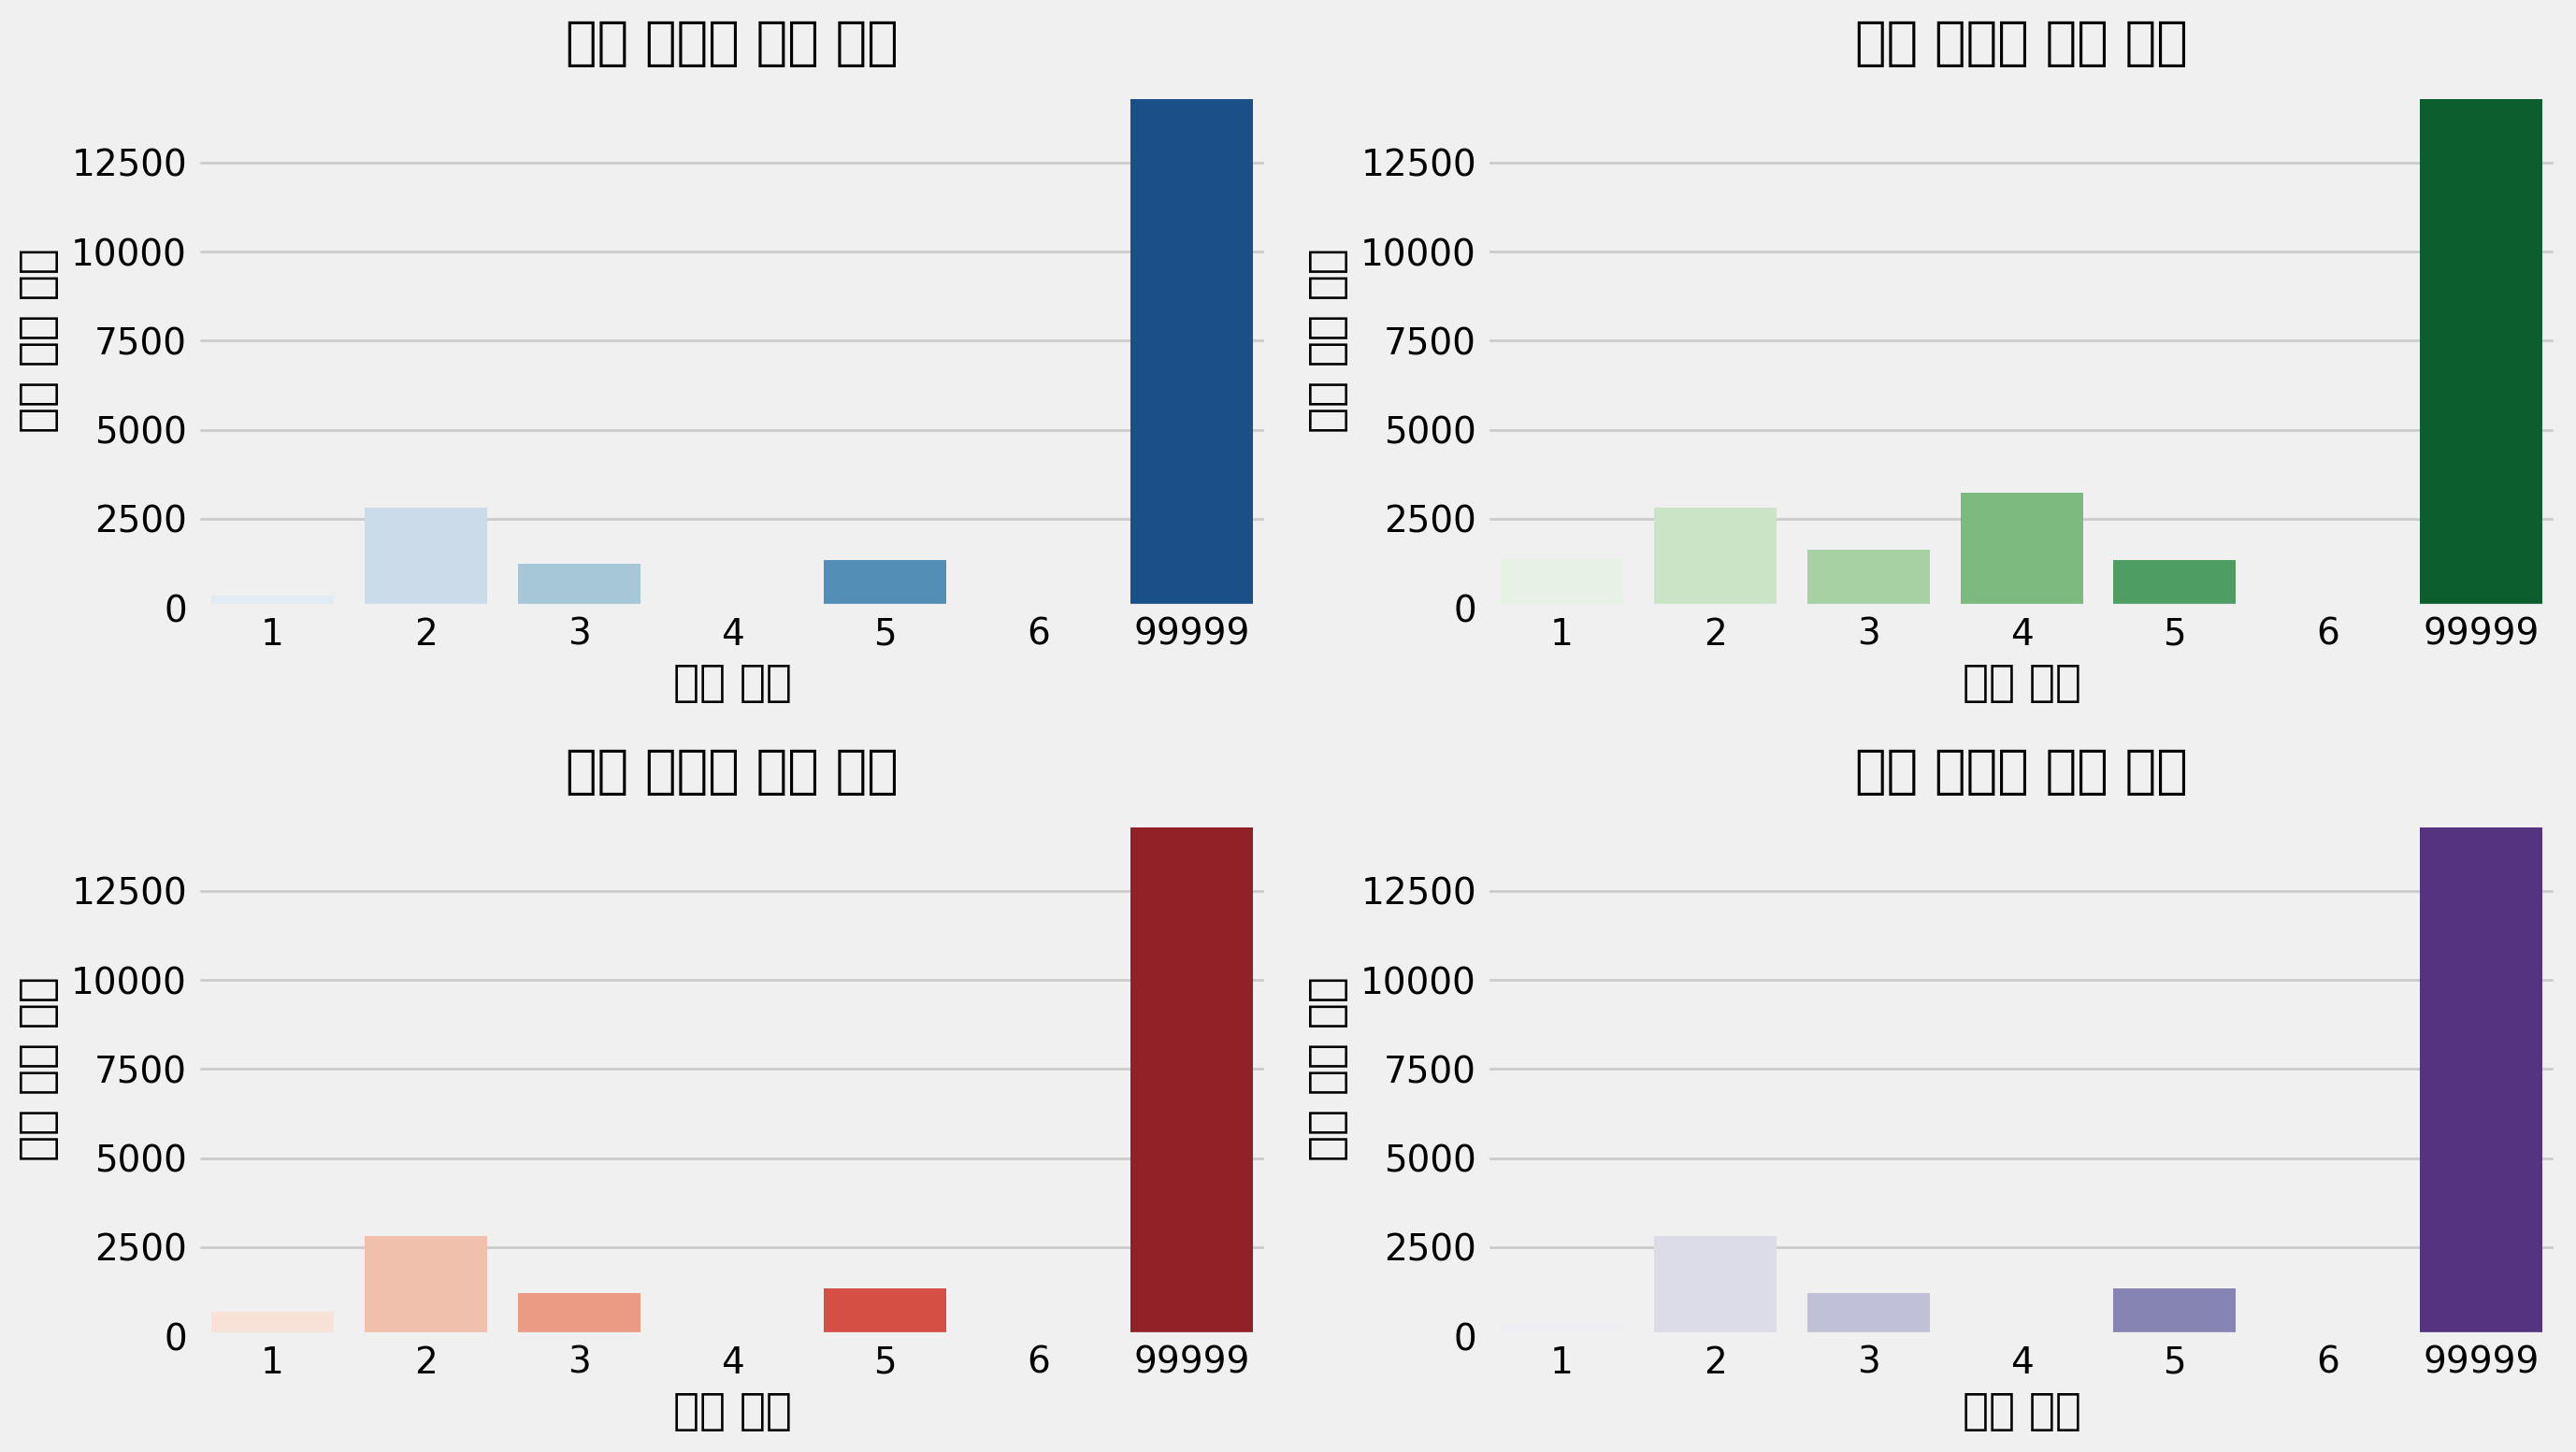

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위해 교육 수준별 음주 빈도의 평균을 계산
mean_values = analysis_df.groupby('교육_수준_1차').mean()

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 1. 맥주 빈도 시각화
plt.subplot(2, 2, 1)
sns.barplot(x=mean_values.index, y=mean_values['맥주_빈도_1차'], palette='Blues')
plt.title('교육 수준별 맥주 빈도')
plt.xlabel('교육 수준')
plt.ylabel('맥주 빈도 평균')

# 2. 소주 빈도 시각화
plt.subplot(2, 2, 2)
sns.barplot(x=mean_values.index, y=mean_values['소주_빈도_1차'], palette='Greens')
plt.title('교육 수준별 소주 빈도')
plt.xlabel('교육 수준')
plt.ylabel('소주 빈도 평균')

# 3. 와인 빈도 시각화
plt.subplot(2, 2, 3)
sns.barplot(x=mean_values.index, y=mean_values['와인_빈도_1차'], palette='Reds')
plt.title('교육 수준별 와인 빈도')
plt.xlabel('교육 수준')
plt.ylabel('와인 빈도 평균')

# 4. 사케 빈도 시각화
plt.subplot(2, 2, 4)
sns.barplot(x=mean_values.index, y=mean_values['사케_빈도_1차'], palette='Purples')
plt.title('교육 수준별 사케 빈도')
plt.xlabel('교육 수준')
plt.ylabel('사케 빈도 평균')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

# 가설4 (용호)


문제정의:많은 한국인이 음주를 한다.

지표결정: Korean Health Records

base 가설: 술은 질병 야기할 것이다.

어떤 질병을 야기하는가?

내가 세운 가설: 술 섭취 빈도, 한번 섭취량 중 더 건강에 치명적인 것은?

## 전처리 시작

In [ ]:
# 결측치로 변환
# 77777은 헤당없음 -> 즉 0, 나머지는 결측치
df.replace(66666, np.nan, inplace=True)
df.replace(77777, 0, inplace=True)
df.replace(99999, np.nan, inplace=True)

In [ ]:
df2 = df[[
'소주_양_1차',
'소주_양_2차',
'소주_양_3차',
'소주_양_4차',
'소주_빈도_1차',
'소주_빈도_2차',
'소주_빈도_3차',
'소주_빈도_4차',
'맥주_양_1차',
'맥주_양_2차',
'맥주_양_3차',
'맥주_양_4차',
'맥주_빈도_1차',
'맥주_빈도_2차',
'맥주_빈도_3차',
'맥주_빈도_4차',
'고혈압_1차',
'고혈압_2차',
'고혈압_3차',
'고혈압_4차',
'당뇨_1차',
'당뇨_2차',
'당뇨_3차',
'당뇨_4차',
'고지혈증_1차',
'고지혈증_2차',
'고지혈증_3차',
'고지혈증_4차'
]]
df2.head()

,소주_양_1차,소주_양_2차,소주_양_3차,소주_양_4차,소주_빈도_1차,소주_빈도_2차,소주_빈도_3차,소주_빈도_4차,맥주_양_1차,맥주_양_2차,...,고혈압_3차,고혈압_4차,당뇨_1차,당뇨_2차,당뇨_3차,당뇨_4차,고지혈증_1차,고지혈증_2차,고지혈증_3차,고지혈증_4차
0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0
1,24.0,21.0,19.0,19.5,5.0,5.0,5.0,4.0,10.0,0.0,...,1,1.0,1,2,1,1.0,1,1,1,1.0
2,0.0,7.0,1.0,4.0,0.0,1.0,1.0,2.0,0.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0
4,7.0,7.0,3.0,6.5,3.0,3.0,4.0,4.0,0.0,0.0,...,1,1.0,1,1,1,1.0,1,1,1,1.0


## 데이터 통합 (1~4차)

In [ ]:
소주량 = df2[['소주_양_1차','소주_양_2차','소주_양_3차','소주_양_4차']].stack().reset_index(drop=True)
소주빈도= df2[['소주_빈도_1차','소주_빈도_2차','소주_빈도_3차','소주_빈도_4차']].stack().reset_index(drop=True)
맥주량= df2[['맥주_양_1차','맥주_양_2차','맥주_양_3차','맥주_양_4차']].stack().reset_index(drop=True)
맥주빈도= df2[['맥주_빈도_1차','맥주_빈도_2차','맥주_빈도_3차','맥주_빈도_4차']].stack().reset_index(drop=True)
고혈압= df2[['고혈압_1차','고혈압_2차','고혈압_3차','고혈압_4차']].stack().reset_index(drop=True)
당뇨= df2[['당뇨_1차','당뇨_2차','당뇨_3차','당뇨_4차']].stack().reset_index(drop=True)
고지혈증= df2[['고지혈증_1차','고지혈증_2차','고지혈증_3차','고지혈증_4차']].stack().reset_index(drop=True)

통합=pd.DataFrame({'소주량':소주량, '소주빈도':소주빈도, '맥주량':맥주량, '맥주빈도':맥주빈도,'고혈압':고혈압,'당뇨':당뇨,'고지혈증':고지혈증})

## 결측치

In [ ]:
#Plots
import missingno as msno
from sklearn.pipeline import make_pipeline
import plotly.graph_objs as go
import plotly.offline as py

def missing_plot(df, name):
    null_feat = pd.DataFrame(len(df) - df.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((df.isnull().sum() / len(df)) * 100, columns=['Percentage'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x=null_feat.index, y=null_feat['Count'], opacity=0.8, text=percentage_null['Percentage'],
                   textposition='auto', marker=dict(color='#7EC0EE', line=dict(color='#000000', width=1.5)))

    layout = dict(title=name)

    fig = dict(data=[trace], layout=layout)
    py.iplot(fig)

# 데이터프레임의 결측치 시각화
missing_plot(통합, 'Missing Values (count & %)')

In [ ]:
통합['소주량'].fillna(0, inplace=True)
통합['소주빈도'].fillna(0, inplace=True)
통합['맥주량'].fillna(0, inplace=True)
통합['맥주빈도'].fillna(0, inplace=True)

## 빈도 값을 범주형에서 연속형으로 변환

In [ ]:

# 소주빈도 값을 변경하기 위한 딕셔너리 생성
소주빈도_mapping = {0: 0,1: 1, 2: 2.5, 3: 4, 4: 10, 5: 20, 6: 30}

# replace 메서드를 사용하여 소주빈도 값 변경
통합['소주빈도'] = 통합['소주빈도'].replace(소주빈도_mapping)

In [ ]:
# 맥주빈도 값을 변경하기 위한 딕셔너리 생성
맥주빈도_mapping = {0: 0,1: 1, 2: 2.5, 3: 4, 4:10, 5: 20, 6: 30}

# replace 메서드를 사용하여 맥주빈도 값 변경
통합['맥주빈도'] = 통합['맥주빈도'].replace(맥주빈도_mapping)

In [ ]:
통합.head()

,소주량,소주빈도,맥주량,맥주빈도,고혈압,당뇨,고지혈증
0,3.0,10.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,2.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,24.0,20.0,10.0,1.0,1.0,1.0,1.0


## 고혈압 당뇨 고지혈증 중 가장 음주와 관련 있는 질병은?

In [ ]:
# 소주빈도와 맥주빈도가 0인 그룹과 그렇지 않은 그룹을 나타내는 새로운 열 추가
통합['알코올_섭취'] = (통합['소주빈도'] > 0) | (통합['맥주빈도'] > 0)

# 질병 열을 녹여서 '질병' 및 '발생' 열을 가진 데이터프레임 생성
df_melted = pd.melt(통합, id_vars=['알코올_섭취'], value_vars=['고혈압', '당뇨', '고지혈증'], var_name='질병', value_name='발생')

# 알코올 섭취 및 질병 발생 여부에 따라 그룹화하고 발생 횟수 계산
disease_counts = df_melted.groupby(['알코올_섭취', '질병', '발생'])['발생'].count().reset_index(name='횟수')

# 각 그룹의 총 횟수 계산
total_counts = disease_counts.groupby(['알코올_섭취', '질병'])['횟수'].sum().reset_index(name='총_횟수')

# 발생 확률 계산
disease_counts = disease_counts.merge(total_counts, on=['알코올_섭취', '질병'])
disease_counts['확률'] = disease_counts['횟수'] / disease_counts['총_횟수']

# 결과를 깔끔한 데이터프레임으로 변환
def create_df(df, disease):
    temp = df[df['질병'] == disease].copy()
    result = pd.DataFrame({
        '질병': [disease],
        '알코올_섭취_발생_확률': temp[temp['알코올_섭취'] == True]['확률'].values[1],
        '알코올_미섭취_발생_확률': temp[temp['알코올_섭취'] == False]['확률'].values[1]
    })
    return result

df_result = pd.concat([create_df(disease_counts, '고혈압'), create_df(disease_counts, '당뇨'), create_df(disease_counts, '고지혈증')])
df_result = df_result.reset_index(drop=True)

print(df_result)

     질병  알코올_섭취_발생_확률  알코올_미섭취_발생_확률
0   고혈압      0.103030       0.084416
1    당뇨      0.045455       0.025384
2  고지혈증      0.040000       0.036009


In [ ]:
from scipy.stats import chi2_contingency

#  contingency table 생성
contingency_table = pd.crosstab(통합['알코올_섭취'], 통합['당뇨'])

# chi-square test 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 9.31
P-value: 0.002
Degrees of freedom: 1
Expected frequencies:
[[1634.22368421   59.77631579]
 [1591.77631579   58.22368421]]


In [ ]:
#  contingency table 생성
contingency_table = pd.crosstab(통합['알코올_섭취'], 통합['고혈압'])

# chi-square test 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 3.20
P-value: 0.074
Degrees of freedom: 1
Expected frequencies:
[[1535.44078947  158.55921053]
 [1495.55921053  154.44078947]]


In [ ]:
#  contingency table 생성
contingency_table = pd.crosstab(통합['알코올_섭취'], 통합['고지혈증'])

# chi-square test 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.26
P-value: 0.608
Degrees of freedom: 1
Expected frequencies:
[[1629.66447368   64.33552632]
 [1587.33552632   62.66447368]]


술 섭취와 관련이 있는 질병은 '당뇨'이다.

## 그럼 당뇨를 유발하는 요인은 빈도인가 양인가?

In [ ]:
# 고혈압과 고지혈증, 알코올 섭취 컬럼 제거
통합 = 통합.drop(['고혈압', '고지혈증','알코올_섭취'], axis=1)

# 결과 확인
print(통합.head())

    소주량  소주빈도   맥주량  맥주빈도   당뇨
0   3.0  10.0   0.0   0.0  1.0
1   0.0   0.0   0.0   0.0  1.0
2   0.0   0.0   0.0   0.0  1.0
3   0.0   0.0   0.0   0.0  1.0
4  24.0  20.0  10.0   1.0  1.0


In [ ]:
# '소주량', '소주빈도' 열에서 값이 0인 행을 제외합니다.

통합 = 통합[통합['소주량'] != 0]
통합 = 통합[통합['소주빈도'] != 0]

통합 = 통합[통합['맥주량'] != 0]
통합 = 통합[통합['맥주빈도'] != 0]

In [ ]:
통합['총_알코올_량'] = 통합['소주량'] + 통합['맥주량']
통합['총_알코올_빈도'] = 통합['소주빈도'] + 통합['맥주빈도']

In [ ]:
# '총_알코올_빈도'와 '총_알코올_량' 간의 상관 계수 계산
correlation = 통합['총_알코올_빈도'].corr(통합['총_알코올_량'])

# 결과 출력
print(f"Correlation coefficient: {correlation:.3f}")

Correlation coefficient: 0.144


In [ ]:
# 다중공산성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립 변수 설정
X = 통합[['총_알코올_빈도', '총_알코올_량']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# 결과 출력
print(vif)

   VIF Factor  features
0    2.228943  총_알코올_빈도
1    2.228943   총_알코올_량


량과 빈도는 중간의 다중공산성, 약한 상관관계 보임

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X = 통합[['총_알코올_빈도', '총_알코올_량']]
y = 통합['당뇨']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 결과 출력
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[0.36077813 0.33934845]]
Intercept: [-3.07005236]


차이가 없다

로지스틱 회귀분석은 다중공산성의 문제가 있어서 완전 신뢰할 수 없다.

In [ ]:
from sklearn.metrics import accuracy_score

# 데이터 준비
X = 통합[['총_알코올_빈도', '총_알코올_량']]
y = 통합['당뇨']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# 변수 중요도 출력
print(f"Feature importances: {model.feature_importances_}")

Accuracy: 0.967
Feature importances: [0.38890125 0.61109875]


알코올 섭취 량이 중요

In [ ]:
통합[['총_알코올_빈도', '총_알코올_량', '당뇨']].corr()

,총_알코올_빈도,총_알코올_량,당뇨
총_알코올_빈도,1.000000,0.144169,0.078700
총_알코올_량,0.144169,1.000000,0.054053
당뇨,0.078700,0.054053,1.000000
